<hr/>
<h1><center> Data Modelling - Phnom Penh</center></h1>
<hr/>

***

What is time series?
* Time series is a collection of data points that are collected at constant time intervals.
* It is time dependent.
* Most of time series have some form of seasonality trends. For example, if we sale ice cream, most probably there will be higher sales in summer seasons. Therefore, this time series has seasonality trends.
* Another example, lets think we dice one time every day during 1 year. As you guess, there will be no scenario like that number six is appeared mostly in summer season or number five is mostly appeared in January. Therefore, this time series does not have seasonality trends.

Stationarity of a Time Series
* There are three basic criterion for a time series to understand whether it is stationary series or not.
    * Statistical properties of time series such as mean, variance should remain constant over time to call time series is stationary
        * constant mean
        * constant variance
        * autocovariance that does not depend on time. autocovariance is covariance between time series and lagged time series.
* Lets visualize and check seasonality trend of our time series.

### Data Description

1. Date
2. Time 
3. Water Content (m3/m3)
4. Solar Radiation (W/m2)
5. Rain (mm)
6. Temperature (Celcuis)
7. RH (%)
8. Wind Speed (m/s)
9. Gust Speed (m/s)
10. Wind Direction (Degree)
11. Dew Point (Celcuis)

# Import Packages
***

In [2]:
# importing the required modules
import glob
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#important libraries for statistical 

from datetime import datetime, date 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

# Read the Data
***

In [3]:
# specifying the path to csv files
# change ur directory here based on pwd

#path = "/Users/votanasrey/Documents/Term10/ProjectII/Cambodia_Weather_Forcasting_Prediction_With_Time_Series/datasets/intermediate_layer/phnom_penh"
path = "../datasets/intermediate_layer/phnom_penh"

# csv files in the path
#data = pd.read_csv(path + "/cleaned_dataset_phnom_penh.csv")
#data.drop("Unnamed: 0", axis=1, inplace=True)
data1 = pd.read_csv(path + "/cleaned_dataset_phnom_penh.csv")
data1.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
#import another dataset after fixed 
data2 = pd.read_excel(path + "/missed_month_cleaned_dataset.xlsx")

# Rename Columns
# Renaming certain columns for better readability
data2.rename(
    columns={'Date': 'date', 
                        'Time': 'time',
                        'Water Content (m3/m3)': 'water_content',
                        'Solar Radiation (W/m2)': 'solar_radiation',
                        'Rain (mm)': 'rain',
                        'Temperature (Celcius)': 'temperature',
                        'RH (%)': 'rh',
                        'Wind Speed (m/s)' : 'wind_speed',
                        'Gust Speed (m/s)' : 'gust_speed',
                        'Wind Direction (Degree)' : 'wind_direction',
                        'Dew Point (Celcius)' : 'dew_point',
}, inplace=True)

In [5]:
#drop the index before concat 
data1 = data1.reset_index(drop=True)
data2 = data2.reset_index(drop=True)

#convert to date time 
data1['date'] = pd.to_datetime(data1['date'], yearfirst=True)
data2['date'] = pd.to_datetime(data2['date'], yearfirst=True)

#set index 
#data1 = data1.set_index('date')
#data2 = data2.set_index('date')

In [6]:
#merge the dataset 
combine_data_frames = [data1, data2]
#using concat function to concat dataframes as vertical 
data = pd.concat(combine_data_frames)
data.tail()

,date,time,water_content,solar_radiation,rain,temperature,rh,wind_speed,gust_speed,wind_direction,dew_point
25054,2021-10-30,23:40:00,0.3069,1,0.0,27.65,89.2,0.0,0.0,257.0,25.75
25055,2021-10-30,23:45:00,0.3066,1,0.0,27.58,89.2,0.0,0.0,257.0,25.67
25056,2021-10-30,23:50:00,0.3069,1,0.0,27.60,89.1,0.0,0.3,327.0,25.68
25057,2021-10-30,23:55:00,0.3069,1,0.0,27.60,89.0,0.0,0.7,0.0,25.66
25058,2021-10-31,00:00:00,0.3066,1,0.0,27.65,89.2,0.0,0.7,3.0,25.75


In [7]:
# convert to date
#data['date'] = pd.to_datetime(data['date'])
#data['date'] = pd.to_datetime(data['date'], yearfirst=True)
# verify datatype
#data.info()

In [8]:
#sort the dataframe by and time a
data.sort_values(by=['date'], inplace=True)
#drop the index
#data = data.reset_index(drop=True)
#data.sort_index(axis=0 , ascending=True)
data.tail()

,date,time,water_content,solar_radiation,rain,temperature,rh,wind_speed,gust_speed,wind_direction,dew_point
24576,2022-03-30,07:50:00,0.2780,167,0.0,26.11,90.1,0.0,0.0,41.0,24.39
24575,2022-03-30,07:45:00,0.2780,148,0.0,25.91,90.3,0.0,0.0,41.0,24.23
24574,2022-03-30,07:40:00,0.2780,136,0.0,25.89,90.2,0.0,0.0,42.0,24.19
24484,2022-03-30,00:10:00,0.2783,1,0.0,26.11,84.6,0.0,0.0,65.0,23.34
24770,2022-03-31,00:00:00,0.2780,1,0.0,27.92,82.4,0.0,0.0,31.0,24.68


In [10]:
#change the date data type 
#data['date'] = pd.to_datetime(data['date'], yearfirst=True)
#sort the index of data
#data = data.sort_index(ascending=True)

data = data.reset_index()

In [11]:
#data[data['date'] >= '21/01/30']
#check_date = data[(data['date'] > '2021-01-29') & (data['date'] < '2021-04-10')]
#check_date.tail()

# Data Quality Checking
***

In [12]:
#check the data missing 
data.isnull().any()

index              False
date               False
time               False
water_content      False
solar_radiation    False
rain               False
temperature        False
rh                 False
wind_speed         False
gust_speed         False
wind_direction     False
dew_point          False
dtype: bool

In [13]:
#sum it if it has any
data.isnull().sum()

index              0
date               0
time               0
water_content      0
solar_radiation    0
rain               0
temperature        0
rh                 0
wind_speed         0
gust_speed         0
wind_direction     0
dew_point          0
dtype: int64

In [14]:
#list all the columns which has in dataset 
for i,j in enumerate(data.columns):
    print(i, " ", j)

0   index
1   date
2   time
3   water_content
4   solar_radiation
5   rain
6   temperature
7   rh
8   wind_speed
9   gust_speed
10   wind_direction
11   dew_point


In [15]:
#check the number of columns and rows in dataframe
print("Number of rows in dataframe: ", data.shape[0])
print("**"*50)
print("Number of columns in dataframe: ", data.shape[1])

Number of rows in dataframe:  160724
****************************************************************************************************
Number of columns in dataframe:  12


In [16]:
#checking all datatype in the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160724 entries, 0 to 160723
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   index            160724 non-null  int64         
 1   date             160724 non-null  datetime64[ns]
 2   time             160724 non-null  object        
 3   water_content    160724 non-null  float64       
 4   solar_radiation  160724 non-null  int64         
 5   rain             160724 non-null  float64       
 6   temperature      160724 non-null  float64       
 7   rh               160724 non-null  float64       
 8   wind_speed       160724 non-null  float64       
 9   gust_speed       160724 non-null  float64       
 10  wind_direction   160724 non-null  float64       
 11  dew_point        160724 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 14.7+ MB


,index,water_content,solar_radiation,rain,temperature,rh,wind_speed,gust_speed,wind_direction,dew_point
index,1.000000,-0.002270,-0.026283,0.002697,0.038536,0.080892,0.121354,-0.036992,0.123589,-0.020936
water_content,-0.002270,1.000000,-0.333811,-0.000142,-0.044832,0.012005,0.001126,-0.000062,0.002393,0.033956
solar_radiation,-0.026283,-0.333811,1.000000,-0.001941,0.066473,-0.435094,0.318700,0.036386,-0.024820,0.003822
rain,0.002697,-0.000142,-0.001941,1.000000,-0.078116,-0.011042,0.000311,0.000165,0.001732,-0.110972
temperature,0.038536,-0.044832,0.066473,-0.078116,1.000000,-0.267848,-0.010108,-0.743139,-0.323665,-0.346256
rh,0.080892,0.012005,-0.435094,-0.011042,-0.267848,1.000000,-0.290692,0.185617,0.151895,0.236384
wind_speed,0.121354,0.001126,0.318700,0.000311,-0.010108,-0.290692,1.000000,0.043985,0.081841,-0.028124
gust_speed,-0.036992,-0.000062,0.036386,0.000165,-0.743139,0.185617,0.043985,1.000000,0.275691,0.549423
wind_direction,0.123589,0.002393,-0.024820,0.001732,-0.323665,0.151895,0.081841,0.275691,1.000000,0.141449
dew_point,-0.020936,0.033956,0.003822,-0.110972,-0.346256,0.236384,-0.028124,0.549423,0.141449,1.000000


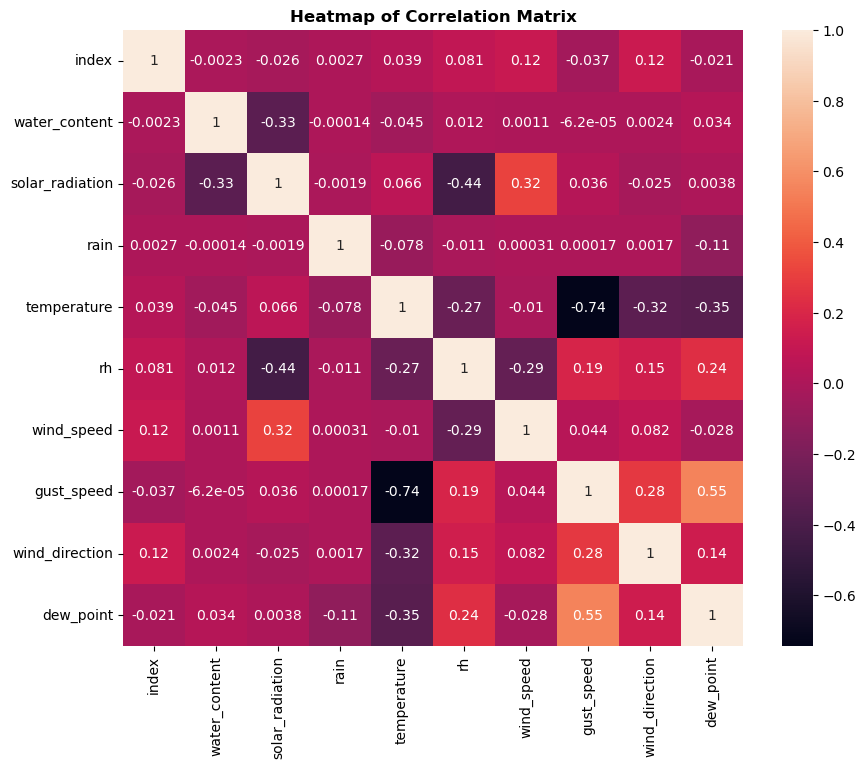

In [17]:
# Create a correlation matrix. What features correlate the most with turnover? What other correlations did you find?

plt.figure(figsize=(10,8))

correlation = data.corr()
correlation = (correlation)
sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values, annot=True)

plt.title('Heatmap of Correlation Matrix', fontweight='bold')
correlation

# Data Wrangling | Cleansing
***

In [18]:
#select only number features
numeric_features = data.select_dtypes(include=np.number).columns.tolist()
numeric_features

['index',
 'water_content',
 'solar_radiation',
 'rain',
 'temperature',
 'rh',
 'wind_speed',
 'gust_speed',
 'wind_direction',
 'dew_point']

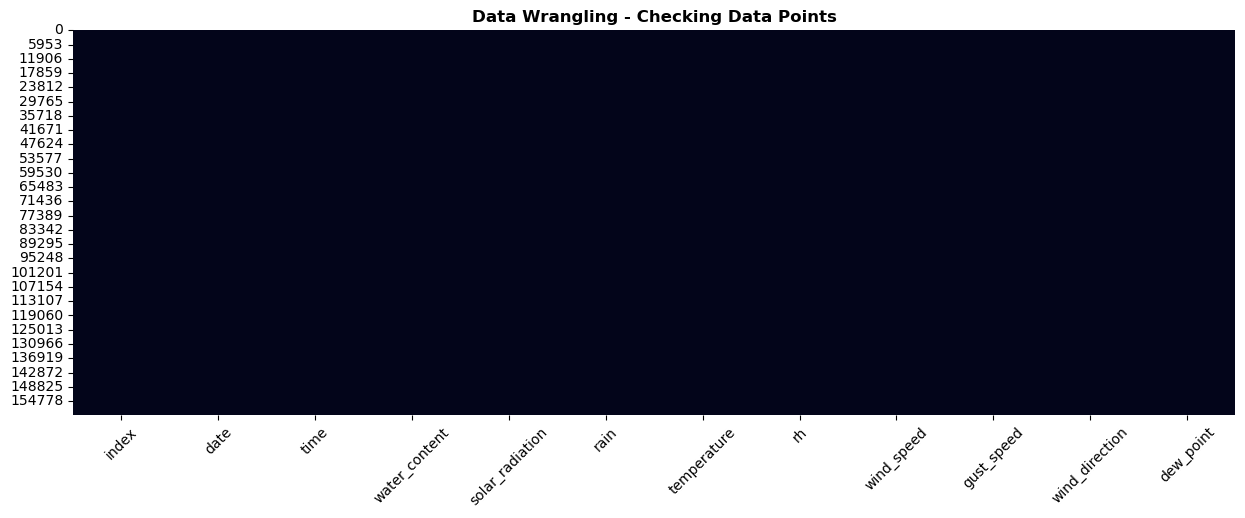

In [19]:
#check data null ft heatmap
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar=False)
plt.title("Data Wrangling - Checking Data Points", fontweight='bold')
plt.xticks(rotation='45')
plt.show()

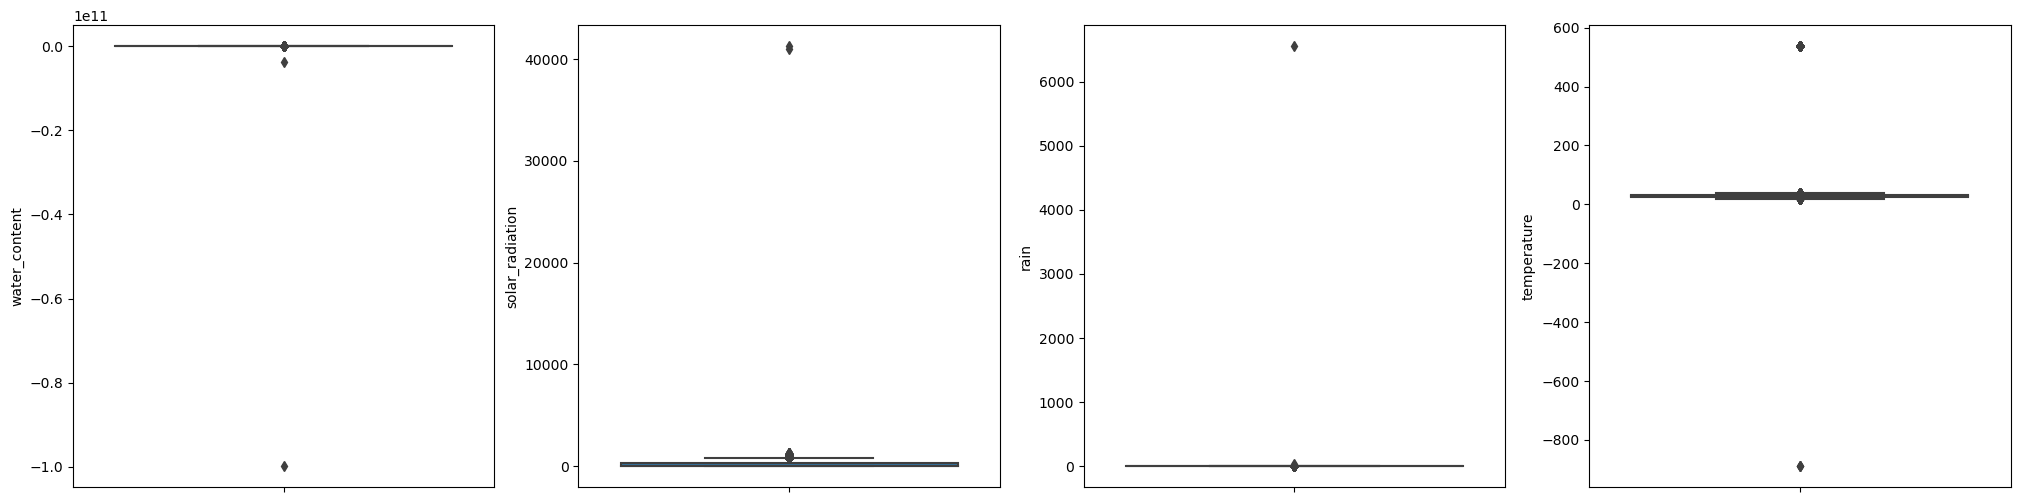

In [20]:
#check outlier of dataframe
f, axes = plt.subplots(ncols=4, figsize=(25, 6))

sns.boxplot(y=data['water_content'], ax=axes[0])
sns.boxplot(y=data['solar_radiation'], ax=axes[1])
sns.boxplot(y=data['rain'], ax=axes[2])
sns.boxplot(y=data['temperature'], ax=axes[3])

print()
plt.show()

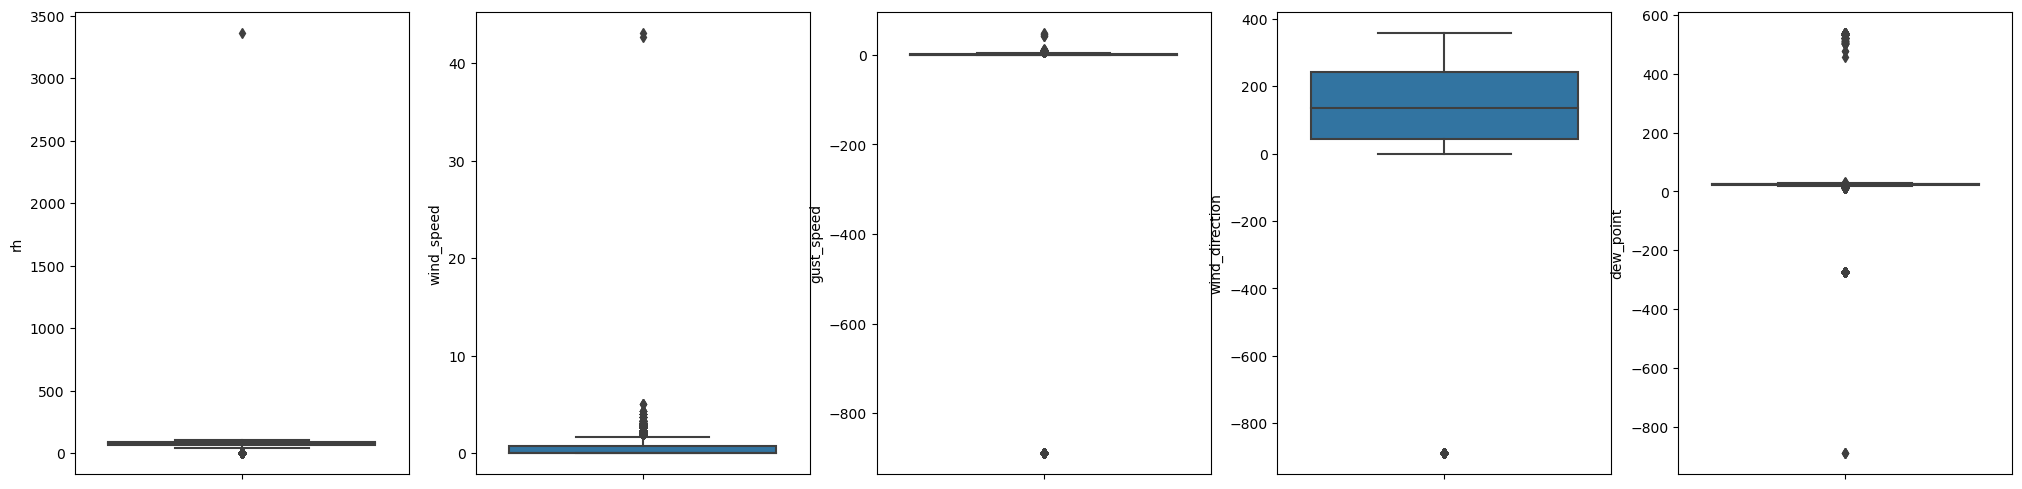

In [21]:
#check outlier of dataframe
f, axes = plt.subplots(ncols=5, figsize=(25, 6))

sns.boxplot(y=data['rh'], ax=axes[0])
sns.boxplot(y=data['wind_speed'], ax=axes[1])
sns.boxplot(y=data['gust_speed'], ax=axes[2])
sns.boxplot(y=data['wind_direction'], ax=axes[3])
sns.boxplot(y=data['dew_point'], ax=axes[4])

print()
plt.show()

In [22]:
#remove outlier from dataset
from scipy.stats import zscore

#create two columns more of zscore value
data['water_content_zscore'] = zscore(data.water_content)
data['solar_radiation_zscore'] = zscore(data.solar_radiation)
data['rain_zscore'] = zscore(data.rain)
data['temperature_zscore'] = zscore(data.temperature)
data['rh_zscore'] = zscore(data.rh)
data['wind_speed_zscore'] = zscore(data.wind_speed)
data['gust_speed_zscore'] = zscore(data.gust_speed)
data['wind_direction_zscore'] = zscore(data.wind_direction)
data['dew_point_zscore'] = zscore(data.dew_point)

#define zscore.
#Z score is in (-3,3) value, if it's out means that it has outlier
data[(data.water_content_zscore > 3.0) | (data.water_content_zscore < -3.0)]
data[(data.solar_radiation_zscore > 3.0) | (data.solar_radiation_zscore < -3.0)]
data[(data.rain_zscore > 3.0) | (data.rain_zscore < -3.0)]
data[(data.temperature_zscore > 3.0) | (data.temperature_zscore < -3.0)]
data[(data.rh_zscore > 3.0) | (data.rh_zscore < -3.0)]
data[(data.wind_speed_zscore > 3.0) | (data.wind_speed_zscore < -3.0)]
data[(data.gust_speed_zscore > 3.0) | (data.gust_speed_zscore < -3.0)]
data[(data.wind_direction_zscore > 3.0) | (data.wind_direction_zscore < -3.0)]
data[(data.dew_point_zscore > 3.0) | (data.dew_point_zscore < -3.0)]

#drop z_score
data = data.drop(data[(data.water_content_zscore > 3.0) | (data.water_content_zscore < -3.0)].index)
data = data.drop(data[(data.solar_radiation_zscore > 3.0) | (data.solar_radiation_zscore < -3.0)].index)
data = data.drop(data[(data.rain_zscore > 3.0) | (data.rain_zscore < -3.0)].index)
data = data.drop(data[(data.temperature_zscore > 3.0) | (data.temperature_zscore < -3.0)].index)
data = data.drop(data[(data.rh_zscore > 3.0) | (data.rh_zscore < -3.0)].index)
data = data.drop(data[(data.wind_speed_zscore > 3.0) | (data.wind_speed_zscore < -3.0)].index)
data = data.drop(data[(data.gust_speed_zscore > 3.0) | (data.gust_speed_zscore < -3.0)].index)
data = data.drop(data[(data.wind_direction_zscore > 3.0) | (data.wind_direction_zscore < -3.0)].index)
data = data.drop(data[(data.dew_point_zscore > 3.0) | (data.dew_point_zscore < -3.0)].index)


In [23]:
data

,index,date,time,water_content,solar_radiation,rain,temperature,rh,wind_speed,gust_speed,...,dew_point,water_content_zscore,solar_radiation_zscore,rain_zscore,temperature_zscore,rh_zscore,wind_speed_zscore,gust_speed_zscore,wind_direction_zscore,dew_point_zscore
0,101890,2020-09-01,17:50:00,0.3062,1,0.2,25.84,96.4,0.0,0.3,...,25.26,0.002589,-0.603061,0.008835,-0.133285,1.099012,-0.575623,0.026633,1.139164,0.096188
1,101871,2020-09-01,16:15:00,0.3084,8,0.0,25.16,94.2,0.0,0.7,...,24.19,0.002589,-0.580253,-0.003396,-0.156488,0.964810,-0.575623,0.036268,0.920708,0.043907
2,101870,2020-09-01,16:10:00,0.3072,9,0.0,25.21,93.8,0.0,0.3,...,24.17,0.002589,-0.576994,-0.003396,-0.154782,0.940410,-0.575623,0.026633,0.909210,0.042930
3,101869,2020-09-01,16:05:00,0.3062,12,0.0,25.09,93.7,0.0,0.7,...,24.03,0.002589,-0.567219,-0.003396,-0.158876,0.934310,-0.575623,0.036268,0.857471,0.036090
4,101868,2020-09-01,16:00:00,0.3084,14,0.0,24.99,93.8,0.7,2.0,...,23.96,0.002589,-0.560702,-0.003396,-0.162288,0.940410,0.577702,0.067582,0.857471,0.032669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160719,24576,2022-03-30,07:50:00,0.2780,167,0.0,26.11,90.1,0.0,0.0,...,24.39,0.002589,-0.062168,-0.003396,-0.124073,0.714707,-0.575623,0.019406,-0.499255,0.053679
160720,24575,2022-03-30,07:45:00,0.2780,148,0.0,25.91,90.3,0.0,0.0,...,24.23,0.002589,-0.124078,-0.003396,-0.130897,0.726907,-0.575623,0.019406,-0.499255,0.045862
160721,24574,2022-03-30,07:40:00,0.2780,136,0.0,25.89,90.2,0.0,0.0,...,24.19,0.002589,-0.163178,-0.003396,-0.131579,0.720807,-0.575623,0.019406,-0.493506,0.043907
160722,24484,2022-03-30,00:10:00,0.2783,1,0.0,26.11,84.6,0.0,0.0,...,23.34,0.002589,-0.603061,-0.003396,-0.124073,0.379203,-0.575623,0.019406,-0.361283,0.002376


<h3><center>After Removed Outlier</center></h3>

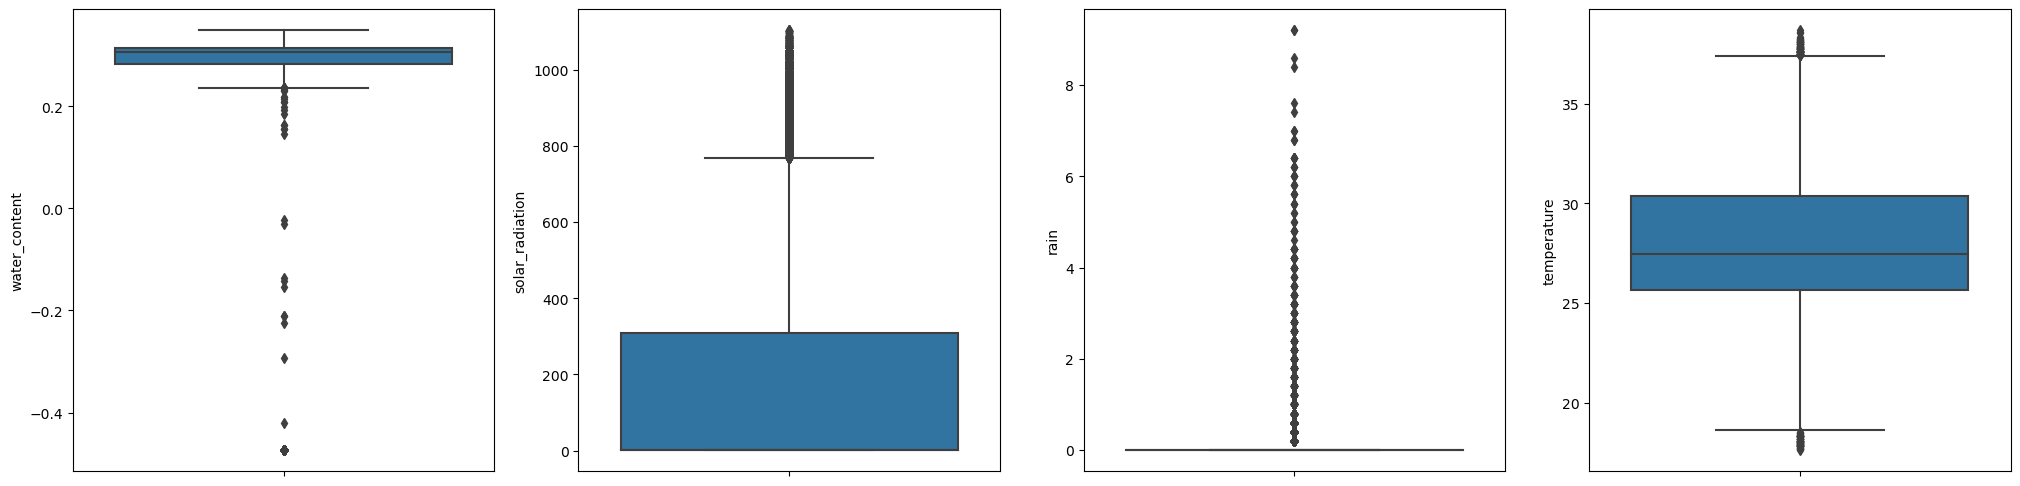

In [24]:
#check outlier of dataframe
f, axes = plt.subplots(ncols=4, figsize=(25, 6))

sns.boxplot(y=data['water_content'], ax=axes[0])
sns.boxplot(y=data['solar_radiation'], ax=axes[1])
sns.boxplot(y=data['rain'], ax=axes[2])
sns.boxplot(y=data['temperature'], ax=axes[3])

print()
plt.show()

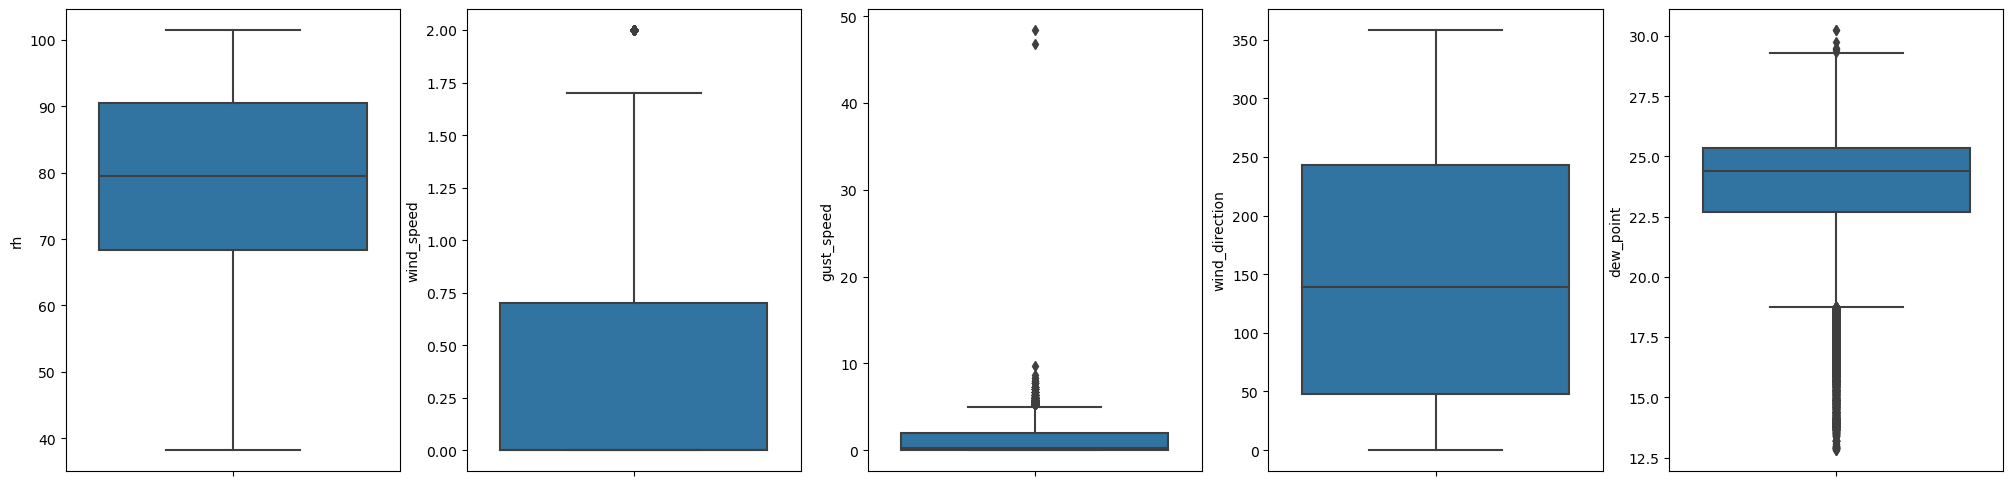

In [25]:
#check outlier of dataframe
f, axes = plt.subplots(ncols=5, figsize=(25, 6))

sns.boxplot(y=data['rh'], ax=axes[0])
sns.boxplot(y=data['wind_speed'], ax=axes[1])
sns.boxplot(y=data['gust_speed'], ax=axes[2])
sns.boxplot(y=data['wind_direction'], ax=axes[3])
sns.boxplot(y=data['dew_point'], ax=axes[4])

print()
plt.show()

In [26]:
#I can see some of features are appear with negative values soo, we can apply this method to remove them out 
#for cols in numeric_features:
#    data = data[data[cols] > 0]

#select data frame only positive values 
data['water_content'].abs()
data.shape

(154881, 21)

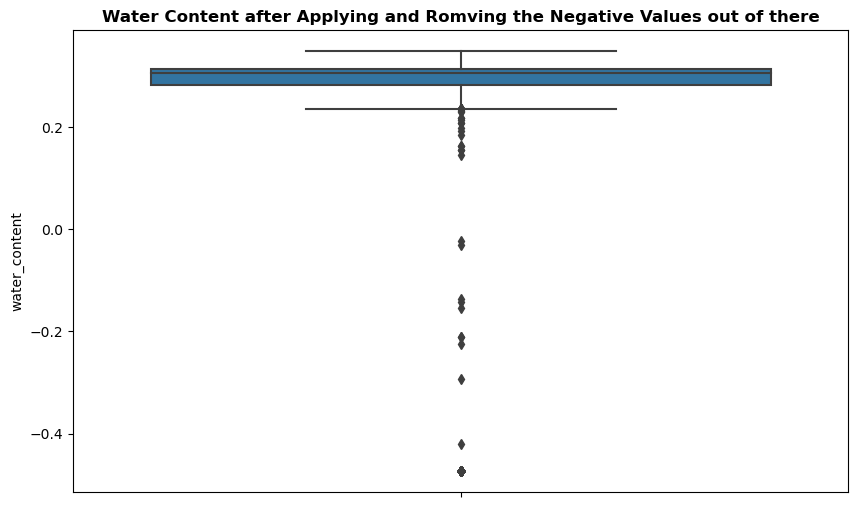

In [27]:
#Water Content after Applying and Romving the Negative Values out of there

sns.boxplot(y=data['water_content'])
plt.title("Water Content after Applying and Romving the Negative Values out of there", fontweight='bold')
plt.show()

In [28]:
#after removing z-score out, we should remove the feature name with z-score values too.

data.drop(['water_content_zscore',
          'water_content_zscore',
          'rain_zscore',
          'temperature_zscore',
          'rh_zscore',
          'wind_speed_zscore',
          'gust_speed_zscore',
          'wind_direction_zscore',
          'dew_point_zscore',
          'solar_radiation_zscore'], 
axis=1, inplace=True)
for i in data.columns:
    print(i)

index
date
time
water_content
solar_radiation
rain
temperature
rh
wind_speed
gust_speed
wind_direction
dew_point


# Exploratory Data Analysis
***

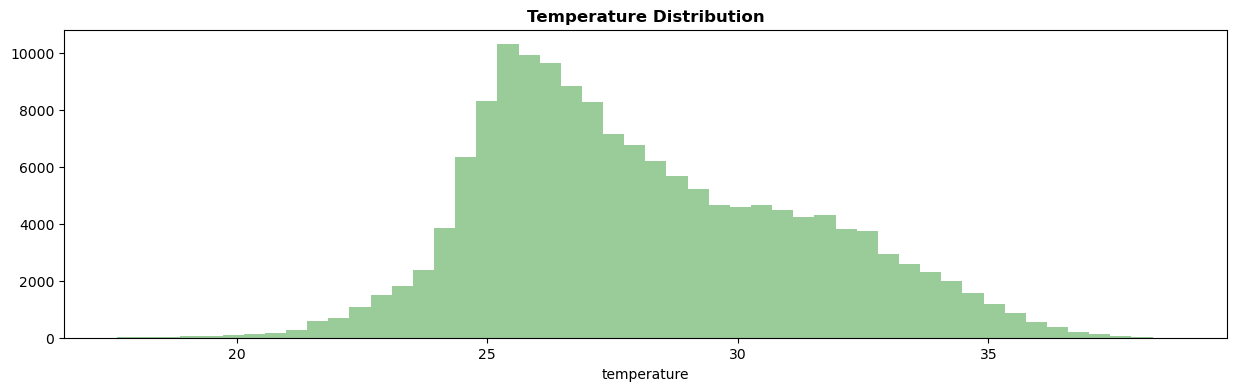

In [61]:
# Set up the matplotlib figure
plt.figure(figsize=(15,4))

# Temperature 
sns.distplot(data.temperature, kde = False, color="g").set_title('Temperature Distribution')
plt.title("Temperature Distribution", fontweight='bold')

plt.show()

In [62]:
solar_tem = data[['solar_radiation', 'temperature']]
#trigger on solar 
solar_tem['shift'] = solar_tem['solar_radiation'].apply(lambda x : "Night" if x == 1 else "Day")

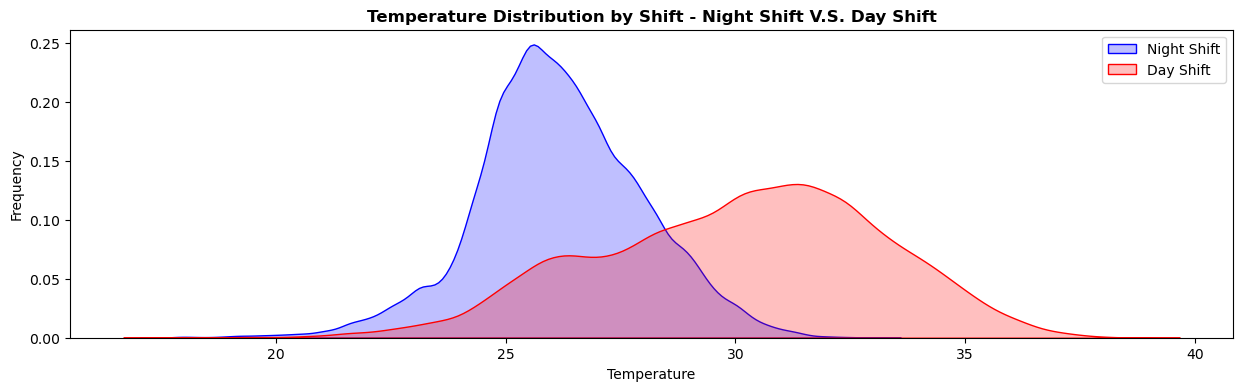

In [63]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(solar_tem.loc[(solar_tem['shift'] == "Night"),'temperature'] , color='b',shade=True, label='Night Shift')
ax=sns.kdeplot(solar_tem.loc[(solar_tem['shift'] == "Day"),'temperature'] , color='r',shade=True, label='Day Shift')
ax.set(xlabel='Temperature', ylabel='Frequency')
plt.legend()
plt.title('Temperature Distribution by Shift - Night Shift V.S. Day Shift', fontweight='bold');


In [64]:
#let's try with temperature values only first 
#select only date and temperature 

tem = data[['date', 'temperature']]
tem.tail()

,date,temperature
160719,2022-03-30,26.11
160720,2022-03-30,25.91
160721,2022-03-30,25.89
160722,2022-03-30,26.11
160723,2022-03-31,27.92


In [65]:
#check data points
tem.shape

(154881, 2)

In [66]:
#Parse strings to datetime type
tem['date'] = pd.to_datetime(tem['date'], yearfirst=True)
#set index from date 
#tem = tem.set_index(['date'])
#I'm going to consider the temperature just from 1900 until the end of 2012
#tem = tem.loc['2020-01-01':'2022-01-01']
#tem.head()

In [67]:
#let's sum and mean on daily temperature 
#tem = tem.append(tem.agg(['mean']).rename({'mean':'avg_daily_temperature'}))
  
tem = tem.groupby(['date'])['temperature'].mean()
tem = pd.DataFrame(tem)
tem.head()

,temperature
date,
2020-09-01,27.922465
2020-09-02,27.288849
2020-09-03,28.490451
2020-09-04,29.692544
2020-09-05,30.362083


In [68]:
#create a function for line plot 
def line_plot(x, y, title):
    plt.figure(figsize=(25,6))
    sns.lineplot(x=x, y=y)
    plt.title(title, fontweight='bold', fontsize=15)
    plt.show()

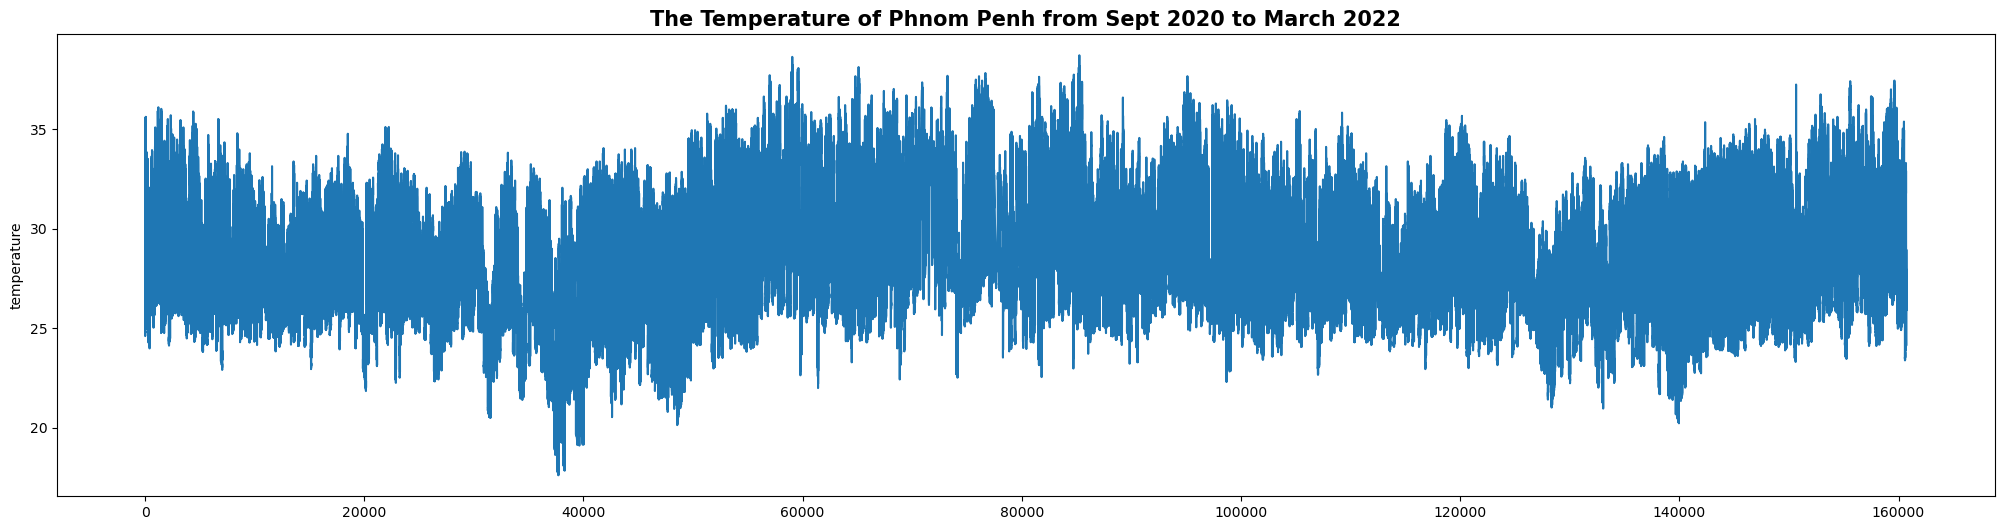

In [69]:
#draw a testing line plot
line_plot(data.date.index, data.temperature, "The Temperature of Phnom Penh from Sept 2020 to March 2022")

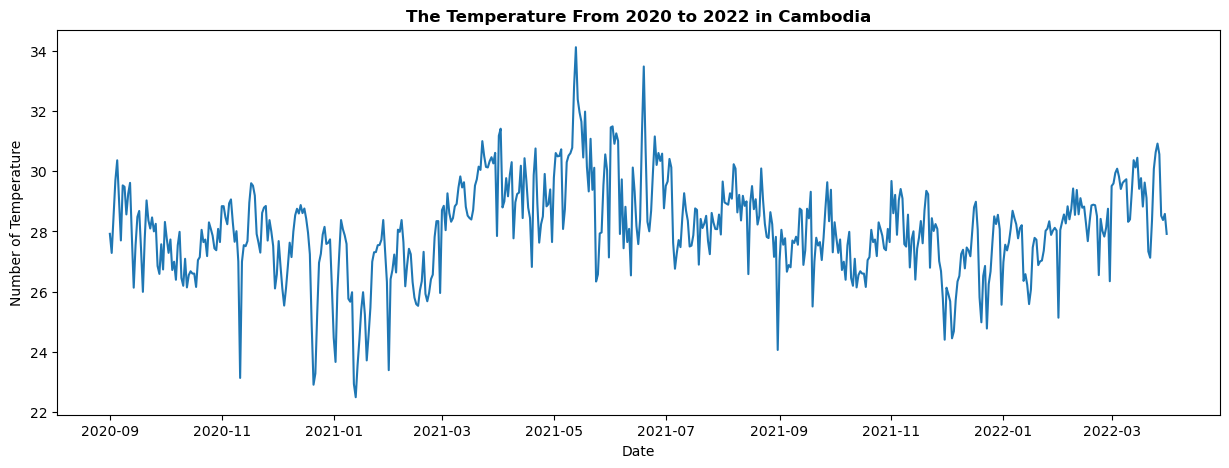

In [70]:
## plot line graph
plt.figure(figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Number of Temperature')
plt.title('The Temperature From 2020 to 2022 in Cambodia', fontweight='bold')
plt.plot(tem)
plt.show()

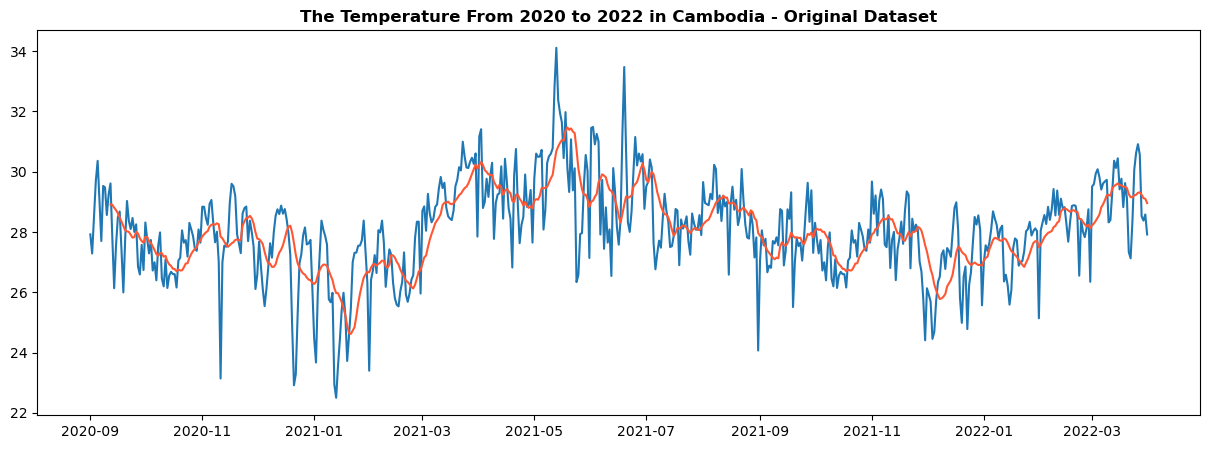

In [71]:
plt.figure(figsize=(15,5))
#check moving average in original dataset 
MA = tem.rolling(window=12).mean()
MA_STD = tem.rolling(window=12).std()
plt.title('The Temperature From 2020 to 2022 in Cambodia - Original Dataset', fontweight='bold')
plt.plot(tem)
plt.plot(MA, color='#FF5733')
plt.show()

In [72]:
tem.head()

,temperature
date,
2020-09-01,27.922465
2020-09-02,27.288849
2020-09-03,28.490451
2020-09-04,29.692544
2020-09-05,30.362083


In [73]:
#check the data between 2021-02 to 2021-04
# Why is this alway increase? 

#tem.loc['2021-2-1':'2021-4-1']
# Select the rows between two dates


start_date = '2021-01-30'
end_date = '2021-04-01'

#t = tem[(tem.index > start_date) & (tem.index <= end_date)]
t = tem[(tem.index >= start_date)]
t.sort_index(ascending=True)

,temperature
date,
2021-01-30,26.325104
2021-01-31,23.400000
2021-02-01,26.417743
2021-02-02,26.719132
2021-02-03,27.235243
...,...
2022-03-27,30.562639
2022-03-28,28.523056
2022-03-29,28.380938


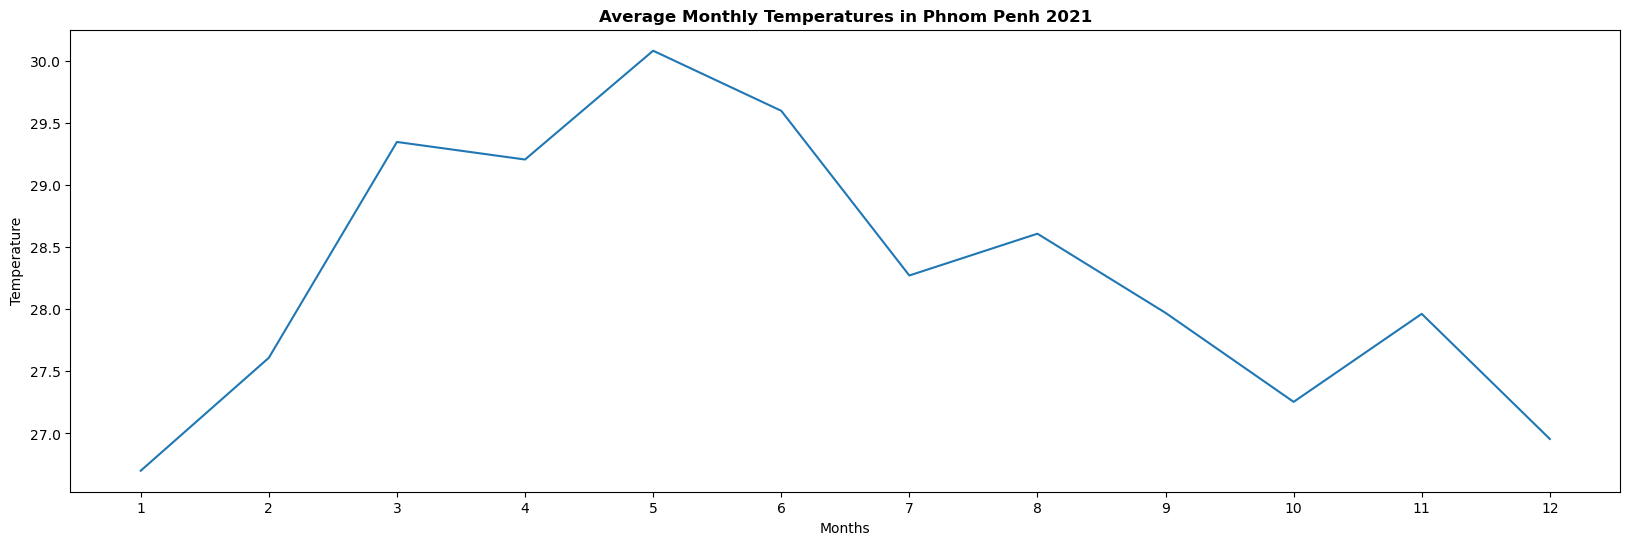

In [74]:
# we are going to create a pivot table to plot the monthly temperatures through the years

tem['month'] = tem.index.month
tem['year'] = tem.index.year
pivot = pd.pivot_table(tem, values='temperature', index='month', columns='year', aggfunc='mean')

monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Average Monthly Temperatures in Phnom Penh 2021', fontweight='bold')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()

In [75]:
#check the pivot 
pivot

year,2020,2021,2022
month,,,
1,NaN,25.950820,27.448486
2,NaN,26.815197,28.403782
3,NaN,29.355628,29.340811
4,NaN,29.206715,NaN
5,NaN,30.083226,NaN
6,NaN,29.599501,NaN
7,NaN,28.272434,NaN
8,NaN,28.609154,NaN
9,28.158727,27.784073,NaN


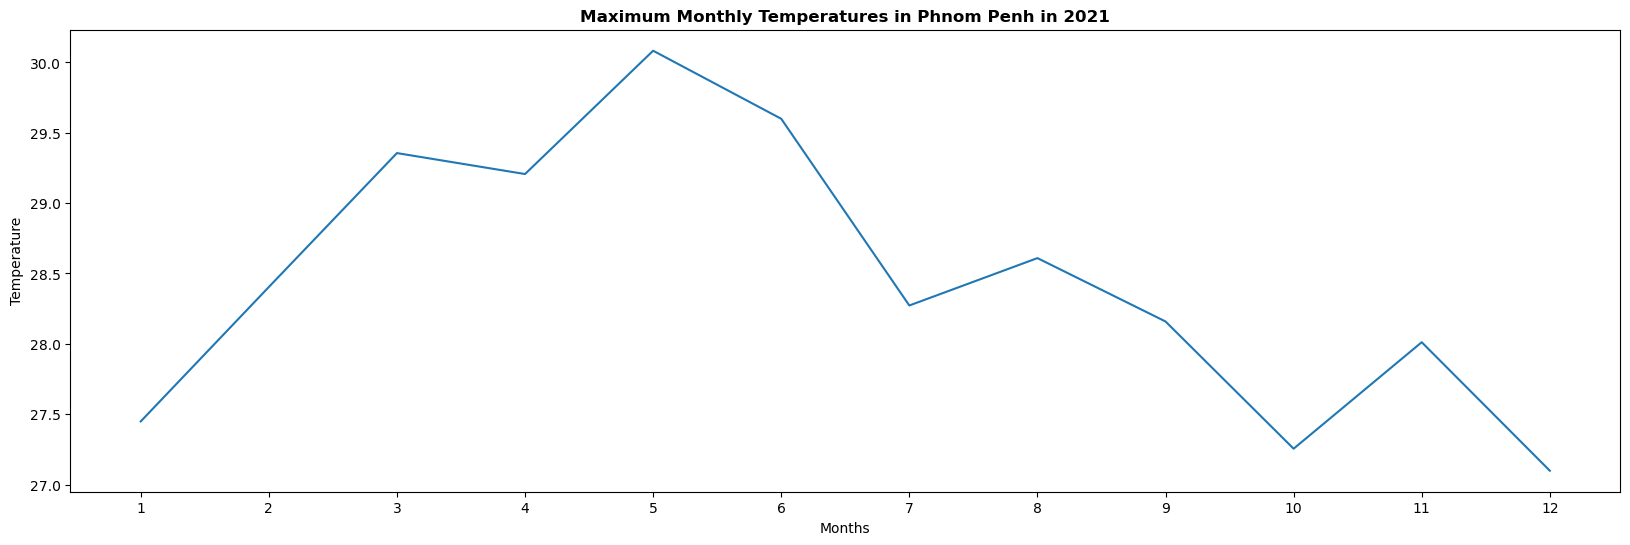

In [76]:
#define the pivot 
#idx=df.groupby(by='ad_id')['date'].idxmax()

max_tem_monthly = pivot.groupby("month").max()

max_monthly_seasonality = max_tem_monthly.max(axis=1)
max_monthly_seasonality.plot(figsize=(20,6))
plt.title('Maximum Monthly Temperatures in Phnom Penh in 2021', fontweight='bold')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()

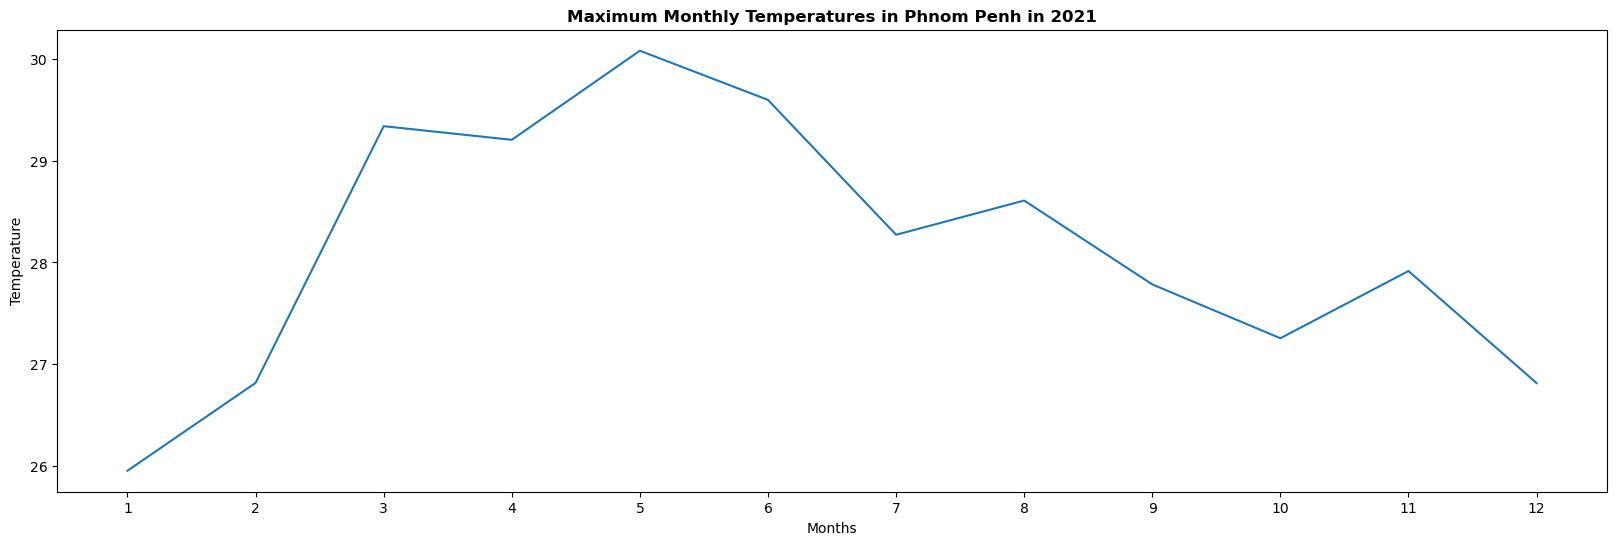

In [77]:
#define the pivot 
#idx=df.groupby(by='ad_id')['date'].idxmax()

min_tem_monthly = pivot.groupby("month").min()

min_tem_monthly = min_tem_monthly.min(axis=1)
min_tem_monthly.plot(figsize=(20,6))
plt.title('Maximum Monthly Temperatures in Phnom Penh in 2021', fontweight='bold')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()

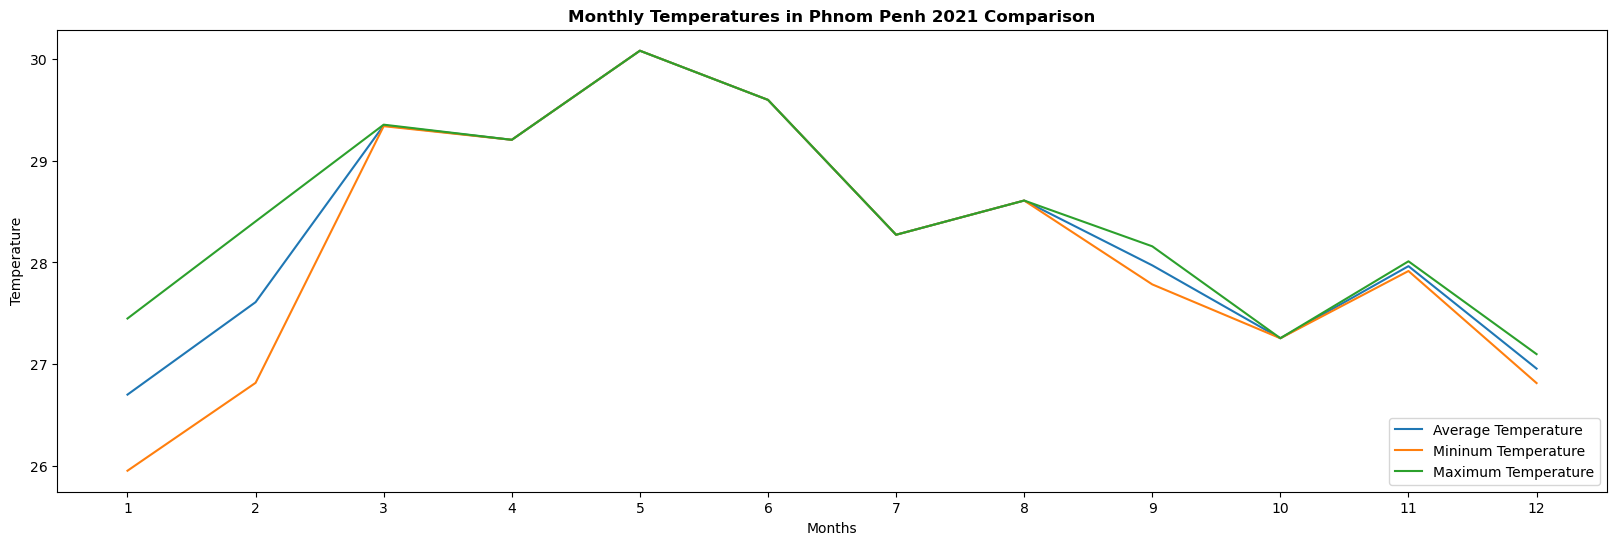

In [78]:
#select all the case in one plot 

#average 
monthly_seasonality.plot(figsize=(20,6), legend="Average Temperature")
#min
min_tem_monthly.plot(figsize=(20,6), legend="Mininum Temperature")
#max
max_monthly_seasonality.plot(figsize=(20,6), legend="Maximum Temperature")

plt.title('Monthly Temperatures in Phnom Penh 2021 Comparison', fontweight='bold')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.legend(["Average Temperature", "Mininum Temperature", "Maximum Temperature"], loc ="lower right")
plt.xticks([x for x in range(1,13)])
plt.show()

In [79]:
#check the tem
tem

,temperature,month,year
date,,,
2020-09-01,27.922465,9,2020
2020-09-02,27.288849,9,2020
2020-09-03,28.490451,9,2020
2020-09-04,29.692544,9,2020
2020-09-05,30.362083,9,2020
...,...,...,...
2022-03-27,30.562639,3,2022
2022-03-28,28.523056,3,2022
2022-03-29,28.380938,3,2022


In [80]:
#drop the month and year out 
tem.drop(['month', 'year'], axis=1, inplace=True)

In [81]:
#Determine rolling statistics
rolmean = tem.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = tem.rolling(window=12).std()
print(rolmean,rolstd)

            temperature
date                   
2020-09-01          NaN
2020-09-02          NaN
2020-09-03          NaN
2020-09-04          NaN
2020-09-05          NaN
...                 ...
2022-03-27    29.314494
2022-03-28    29.240032
2022-03-29    29.124311
2022-03-30    29.104011
2022-03-31    28.962078

[577 rows x 1 columns]             temperature
date                   
2020-09-01          NaN
2020-09-02          NaN
2020-09-03          NaN
2020-09-04          NaN
2020-09-05          NaN
...                 ...
2022-03-27     1.228409
2022-03-28     1.248573
2022-03-29     1.259336
2022-03-30     1.266497
2022-03-31     1.298067

[577 rows x 1 columns]


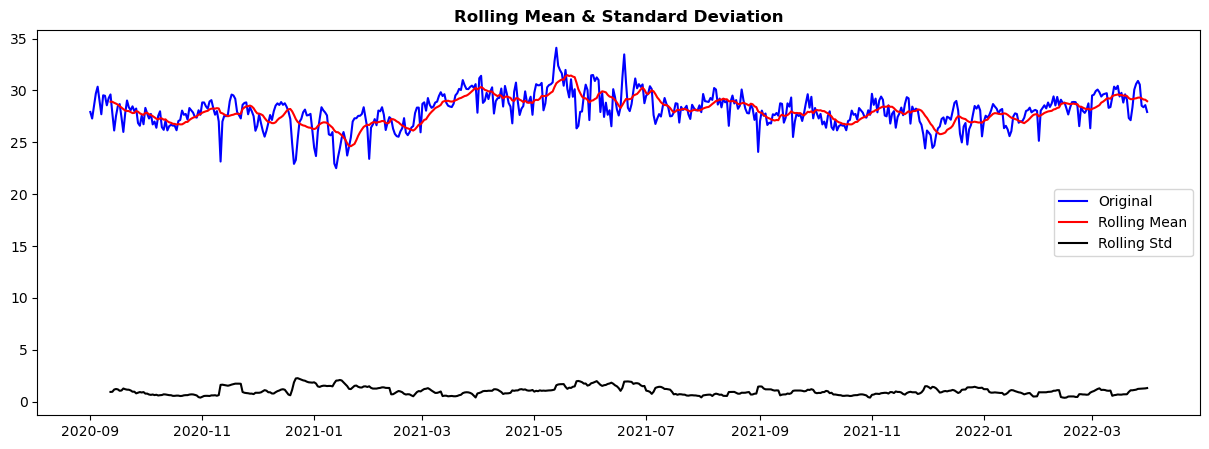

In [82]:
#Plot rolling statistics
plt.figure(figsize=(15,5))

orig = plt.plot(tem, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')

plt.title('Rolling Mean & Standard Deviation', fontweight='bold')
plt.show(block=False)

From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so. 

To further augment our hypothesis that the time series is not stationary, let us perform the ADCF test.

In [83]:
#Perform Augmented Dickey–Fuller test:

print('Results of Dickey Fuller Test:')
dftest = adfuller(data['temperature'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                    -25.856612
p-value                             0.000000
#Lags Used                         76.000000
Number of Observations Used    154804.000000
Critical Value (1%)                -3.430392
Critical Value (5%)                -2.861559
Critical Value (10%)               -2.566780
dtype: float64


For a Time series to be stationary, its ADCF test should have:
1. p-value to be low (according to the null hypothesis)
2. The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics

From the above ADCF test result, we see that p-value(at max can be 1.0) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that **our Time Series at the moment is not stationary**

In [84]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Cambodia Temperature Variation', fontweight='bold')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

In [85]:
#build the function to test the stationarity 

def test_stationarity(timeseries):
    plt.figure(figsize=(15,5))
    # Determining rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    print(timeseries.iloc[:,0].values)
    timeseries = timeseries.iloc[:,0].values
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                    -25.8566
p-value                             0.0000
Lags Used                          76.0000
Number of Observations Used    154804.0000
Critical Value (1%)                -3.4304
Critical Value (5%)                -2.8616
Critical Value (10%)               -2.5668
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


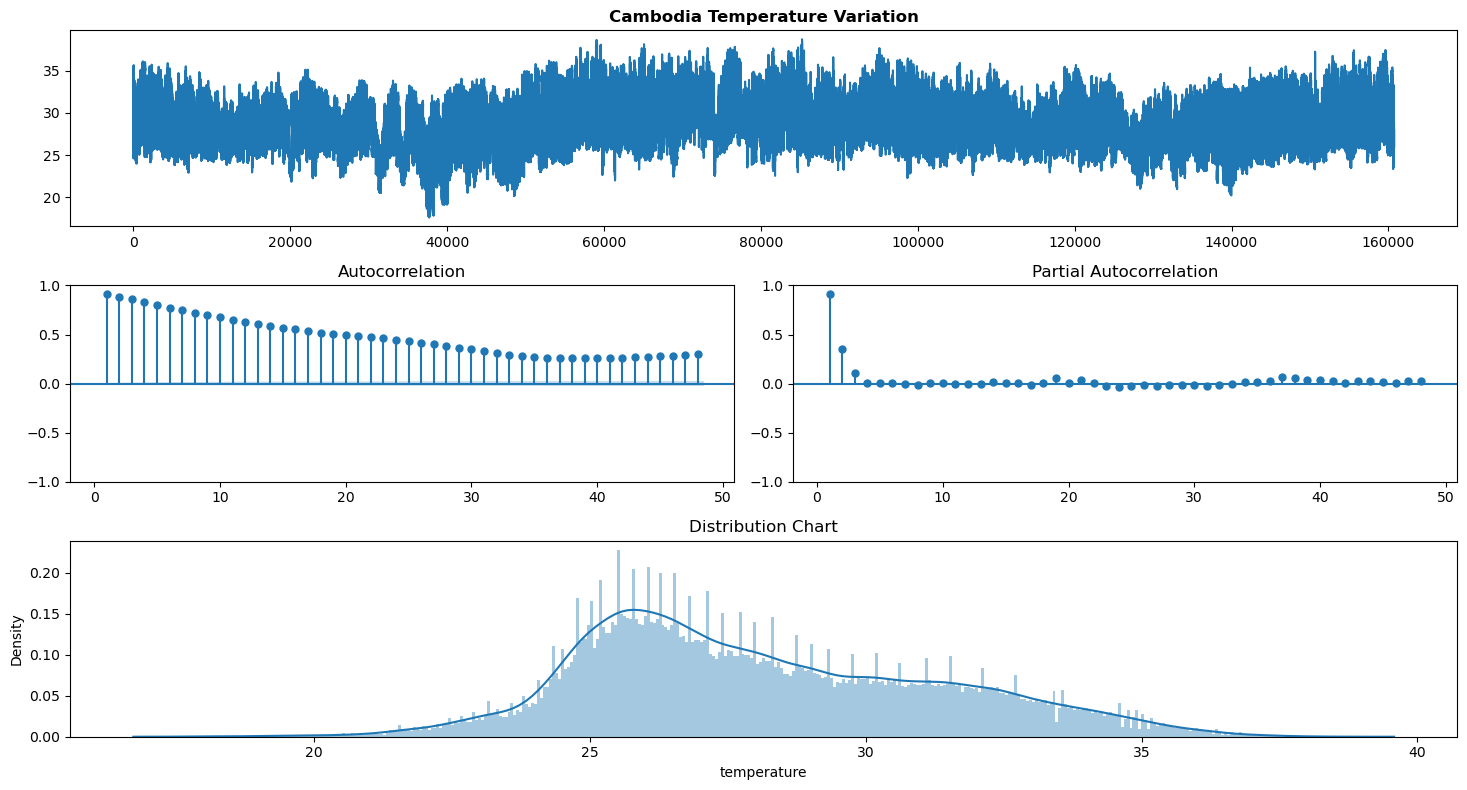

In [86]:
# The first approach is to check the series without any transformation
check_stationarity(data['temperature'])

Results of Dickey-Fuller Test:
Test Statistic                  -3.4073
p-value                          0.0107
Lags Used                       10.0000
Number of Observations Used    566.0000
Critical Value (1%)             -3.4420
Critical Value (5%)             -2.8667
Critical Value (10%)            -2.5695
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


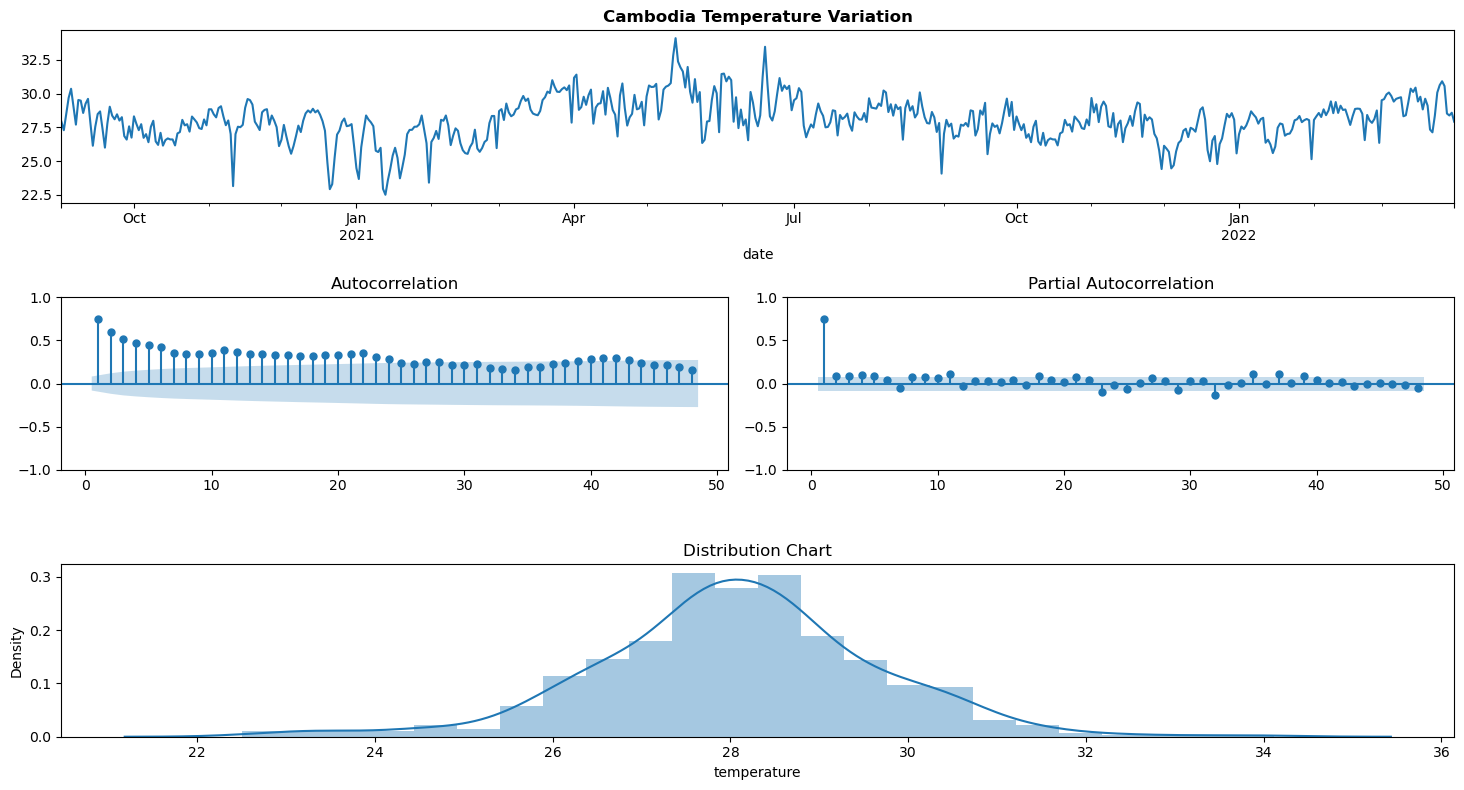

In [87]:
# The first approach is to check the series without any transformation
check_stationarity(tem['temperature'])

# Data Preprocessing
***

## Data Transformation to achieve Stationarity <a name="data-transform"></a>

There are a couple of ways to achieve stationarity through data transformation like taking $log_{10}$,$log_{e}$, square, square root, cube, cube root, exponential decay, time shift and so on ...

 lets start of with log transformations. Our objective is to remove the trend component. Hence,  flatter curves( ie: paralle to x-axis) for time series and rolling mean after taking log would say that our data transformation did a good job.

### Log Scale Transformation  <a name="log"></a>

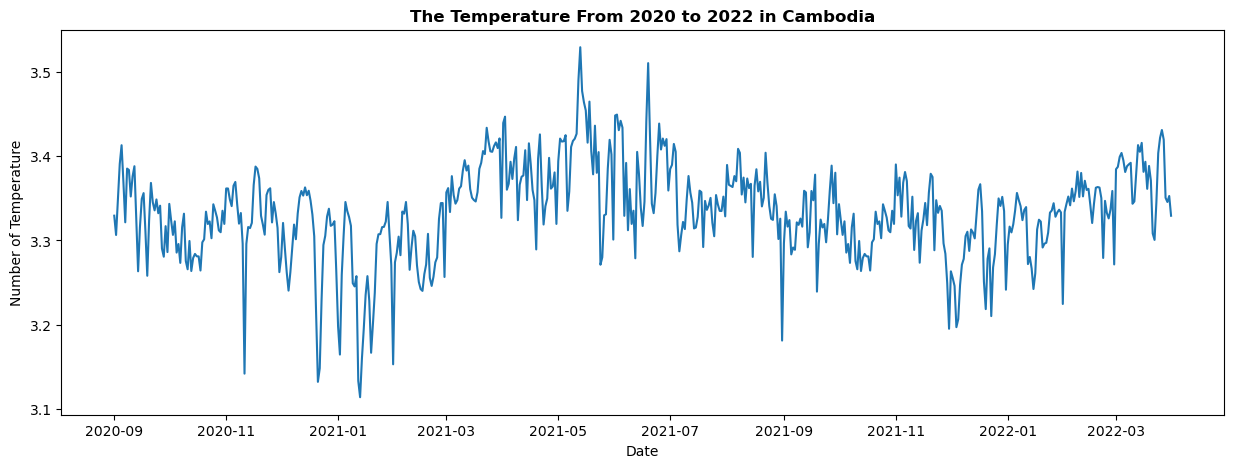

In [228]:
#Estimating trend
tem_logscale = np.log(tem)

## plot line graph
plt.figure(figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Number of Temperature')
plt.title('The Temperature From 2020 to 2022 in Cambodia', fontweight='bold')
plt.plot(tem_logscale)
plt.show()

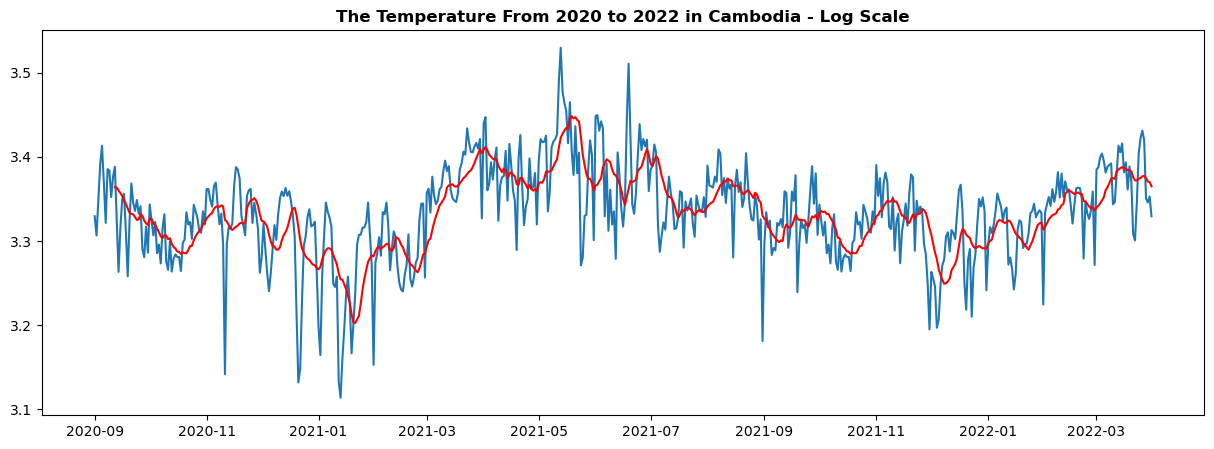

In [229]:
#The below transformation is required to make series stationary

plt.figure(figsize=(15,5))
movingAverage = tem_logscale.rolling(window=12).mean()
movingSTD = tem_logscale.rolling(window=12).std()
plt.title('The Temperature From 2020 to 2022 in Cambodia - Log Scale', fontweight='bold')
plt.plot(tem_logscale)
plt.plot(movingAverage, color='red')
plt.show()

In [230]:
datasetLogScaleMinusMovingAverage = tem_logscale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,temperature
date,
2020-09-12,0.024387
2020-09-13,-0.038173
2020-09-14,-0.096572
2020-09-15,-0.041409
2020-09-16,-0.004279
2020-09-17,0.007412
2020-09-18,-0.033544
2020-09-19,-0.080682
2020-09-20,-0.009742


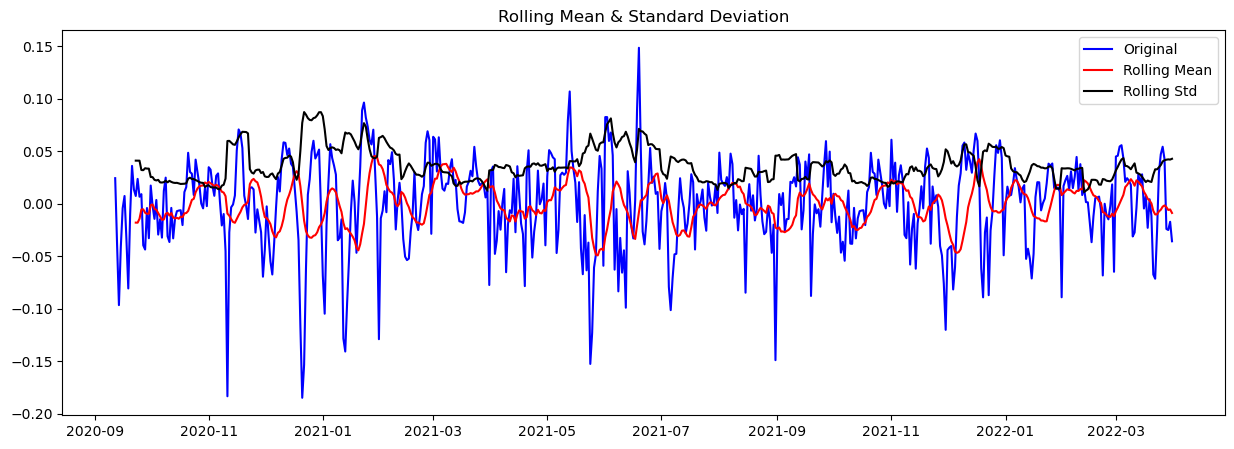

Results of Dickey-Fuller Test:
[ 2.43867046e-02 -3.81730803e-02 -9.65723877e-02 -4.14089071e-02
 -4.27854188e-03  7.41163112e-03 -3.35441177e-02 -8.06822039e-02
 -9.74196226e-03  3.61052639e-02  1.36639185e-02  7.41216942e-03
  2.36926338e-02  6.70337805e-03  9.16348319e-03 -3.95800312e-02
 -4.36099749e-02 -4.04270364e-03 -3.28180377e-02  1.73619202e-02
 -2.19219394e-03 -1.43741542e-02  3.62385737e-03 -2.93403567e-02
 -1.47467204e-02 -3.22528174e-02  1.22674273e-02  2.49099333e-02
 -3.09216496e-02 -3.64514687e-02 -3.93083118e-03 -3.29698077e-02
 -1.37735227e-02 -7.06016804e-03 -6.45208625e-03 -6.13757056e-03
 -2.02961868e-02  1.11489774e-02  1.59806055e-02  4.85965919e-02
  3.03028081e-02  2.86371693e-02  8.36344887e-03  4.20733634e-02
  2.98498122e-02  1.81001748e-02  2.49627967e-04 -4.38306772e-03
  1.52214407e-02 -2.26051780e-03  3.48413605e-02  3.25416130e-02
  1.72329449e-02  7.58886775e-03  2.66435663e-02  2.89343214e-02
  1.86446893e-03 -2.06581782e-02 -9.76515417e-03 -4.5128533

In [231]:
#let's implement it 
test_stationarity(datasetLogScaleMinusMovingAverage)

Results of Dickey-Fuller Test:
Test Statistic                  -3.3999
p-value                          0.0110
Lags Used                       10.0000
Number of Observations Used    566.0000
Critical Value (1%)             -3.4420
Critical Value (5%)             -2.8667
Critical Value (10%)            -2.5695
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


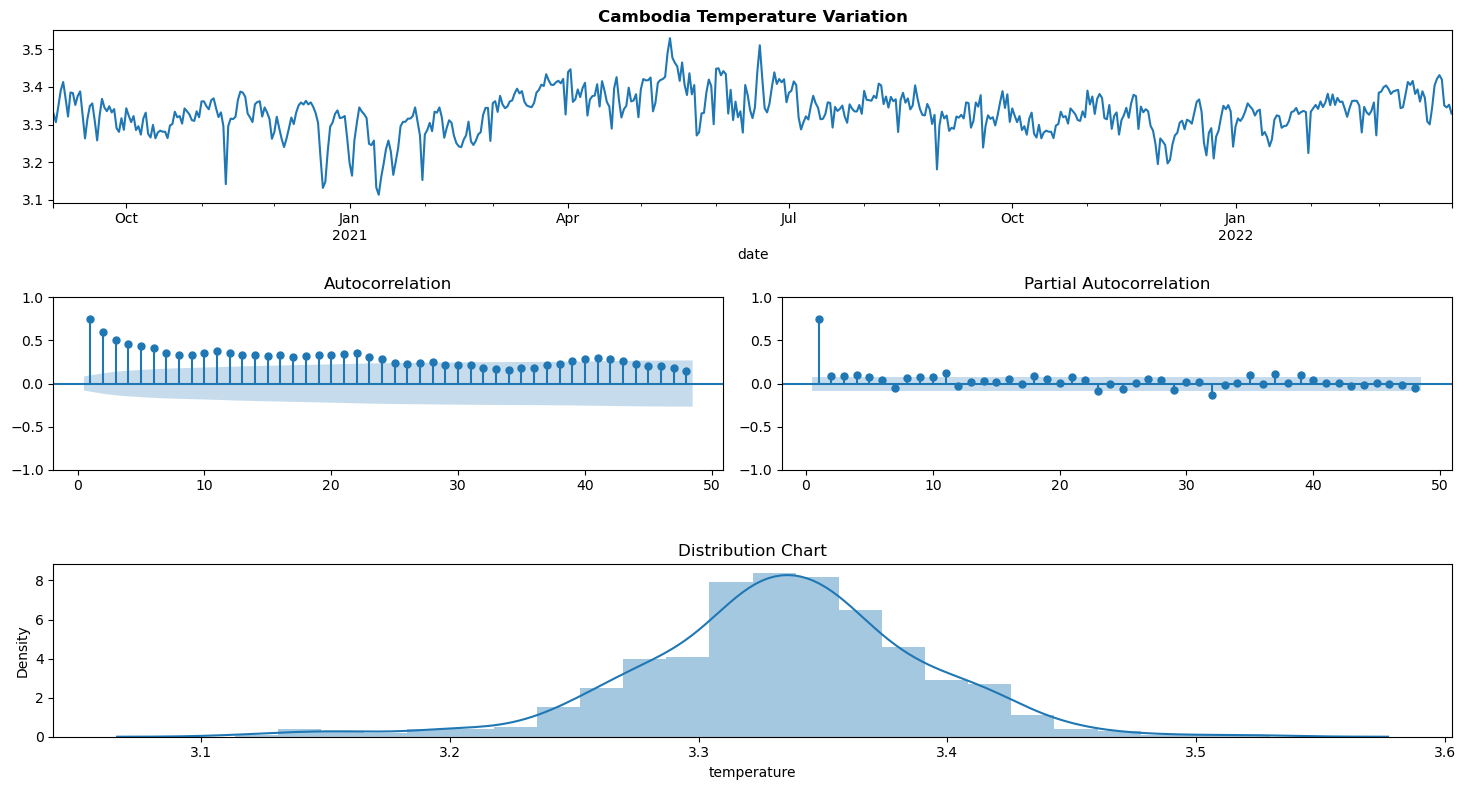

In [232]:
# The first approach is to check the series without any transformation
check_stationarity(tem_logscale['temperature'])

In [233]:
tem_logscale

,temperature
date,
2020-09-01,3.329432
2020-09-02,3.306478
2020-09-03,3.349569
2020-09-04,3.390896
2020-09-05,3.413195
...,...
2022-03-27,3.419778
2022-03-28,3.350713
2022-03-29,3.345718


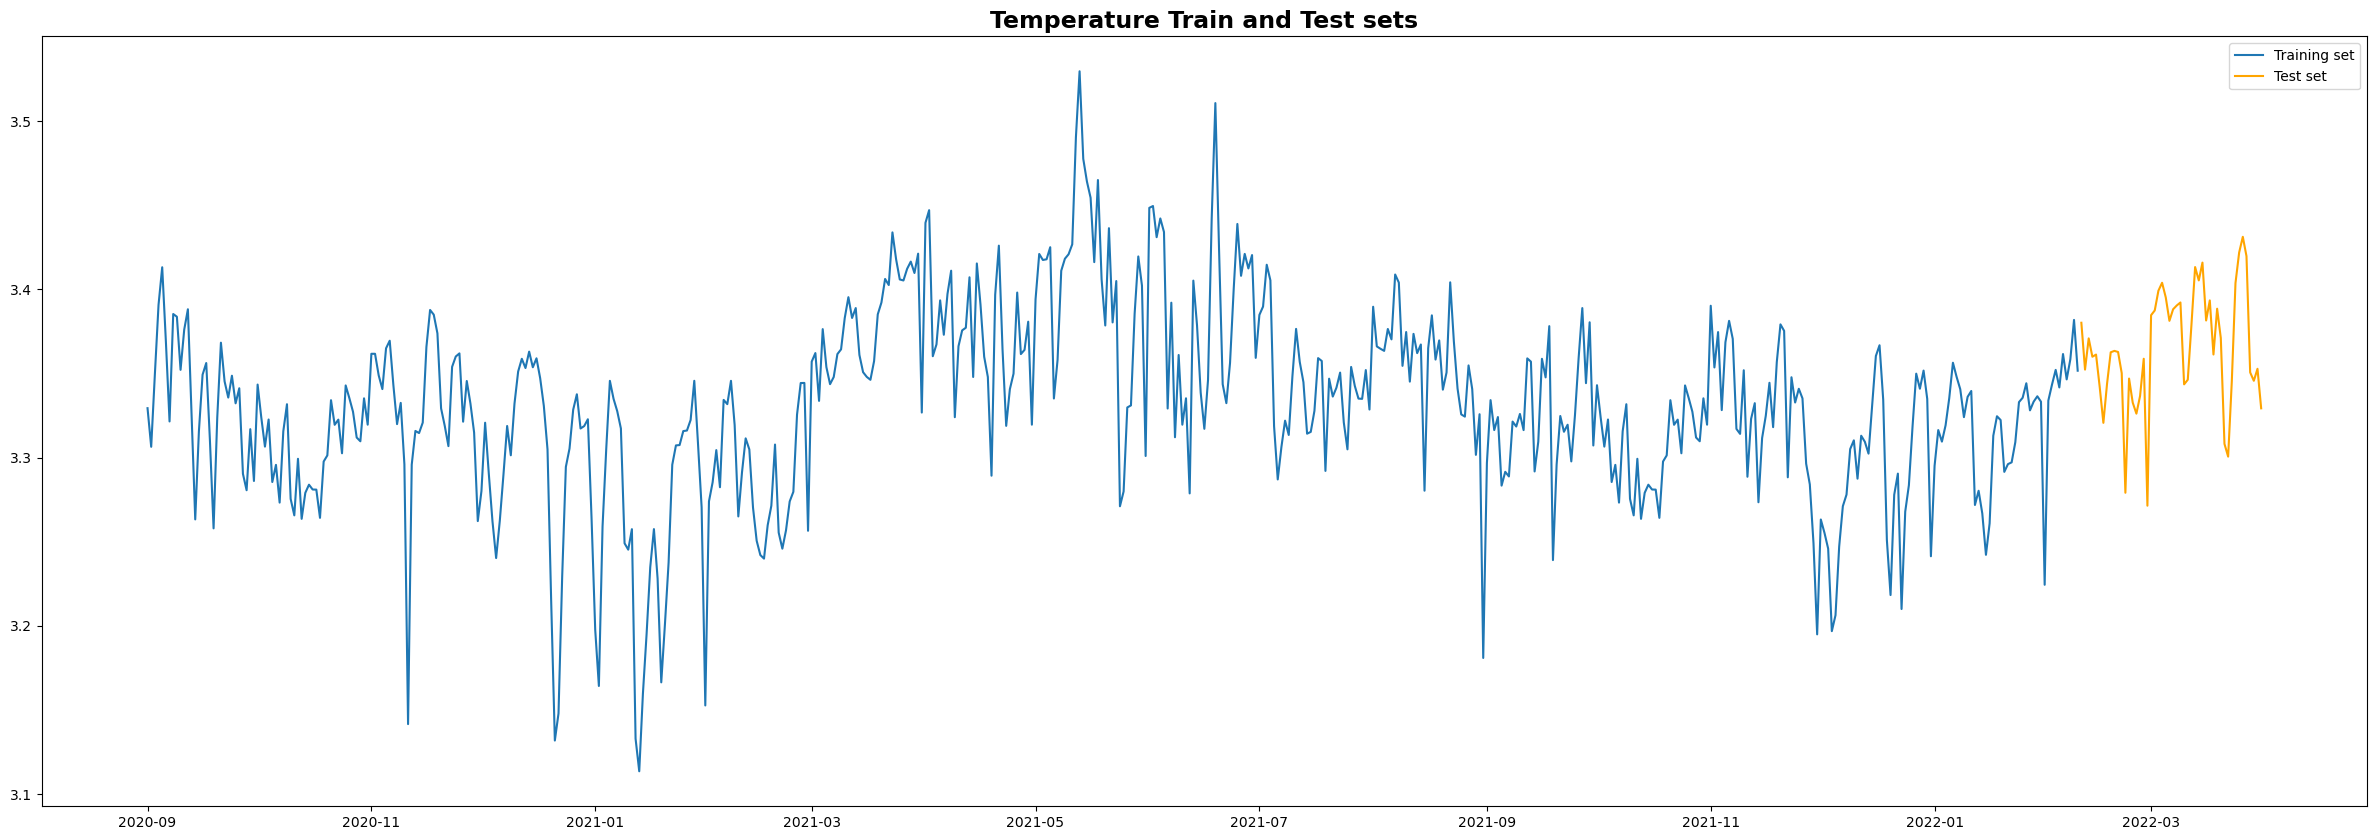

In [234]:
#data split into train and test sets 

test_size = 50

tem_train = tem_logscale[:-test_size]
tem_test = tem_logscale[-test_size:]

plt.figure(figsize=(30,10))
plt.title('Temperature Train and Test sets', fontweight='bold', size=17)
plt.plot(tem_train, label='Training set')
plt.plot(tem_test, label='Test set', color='orange')
plt.legend();

## ML Algorithm Training  

### ARIMA Algorithm Training

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2765.719, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1900.991, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1948.581, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-1922.878, Time=0.23 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1946.540, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1929.605, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-1949.733, Time=0.34 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-1939.302, Time=0.41 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-1937.326, Time=0.35 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1950.722, Time=0.55 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1

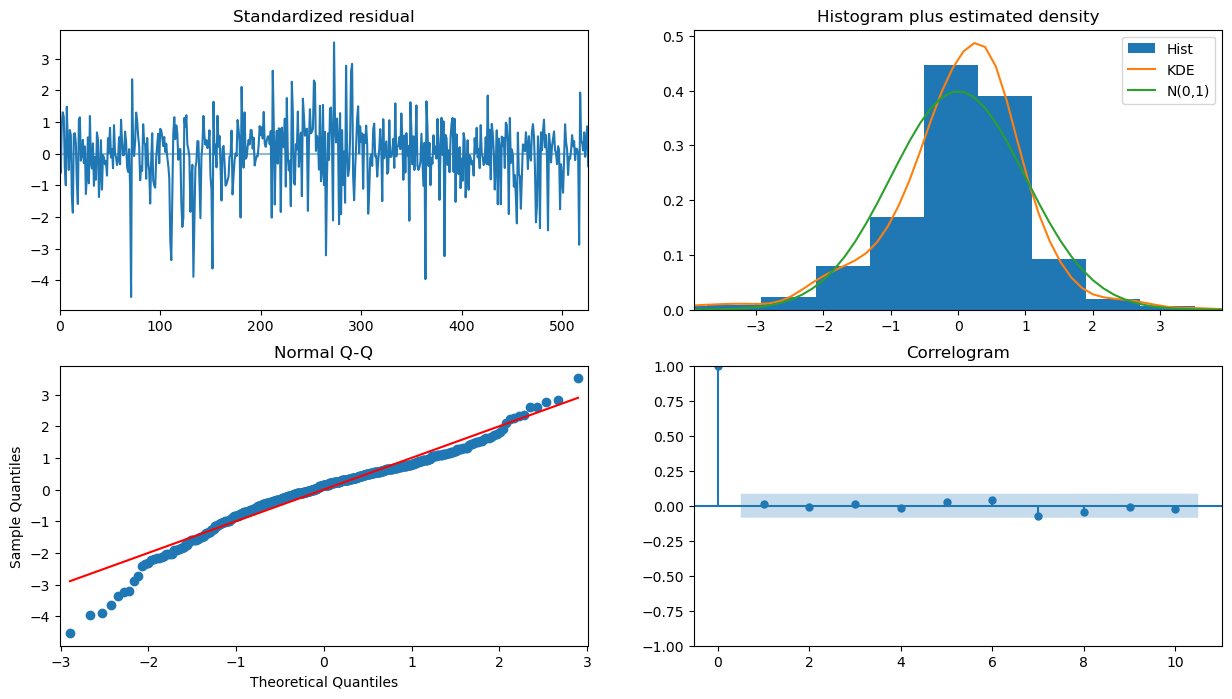

In [300]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(tem_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [323]:
# ARIMA LİBRARY
warnings.filterwarnings("ignore")
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(tem_train, order=(1,0,3)) # (ARIMA) = (1,0,1)
model_fit = model.fit()


# fit model
#(1, 1, 2)
#model = ARIMA(tem_train, order=(5,1,0))
#model = ARIMA(tem_train, order=(1, 0, 0))
#model = ARIMA(tem_train, order=(2,1,2))
#model_fit = model.fit()


# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            temperature   No. Observations:                  527
Model:                 ARIMA(1, 0, 3)   Log Likelihood                 985.622
Date:                Sun, 13 Nov 2022   AIC                          -1959.244
Time:                        21:44:03   BIC                          -1933.641
Sample:                    09-01-2020   HQIC                         -1949.220
                         - 02-09-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3314      0.014    235.290      0.000       3.304       3.359
ar.L1          0.9544      0.019     49.750      0.000       0.917       0.992
ma.L1         -0.3116      0.042     -7.404      0.0

In [324]:
#check the model summary 
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            temperature   No. Observations:                  527
Model:                 ARIMA(1, 0, 3)   Log Likelihood                 985.622
Date:                Sun, 13 Nov 2022   AIC                          -1959.244
Time:                        21:44:04   BIC                          -1933.641
Sample:                    09-01-2020   HQIC                         -1949.220
                         - 02-09-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3314      0.014    235.290      0.000       3.304       3.359
ar.L1          0.9544      0.019     49.750      0.000       0.917       0.992
ma.L1         -0.3116      0.042     -7.404      0.000      -0.394      -0.229
ma.L2         -0.2079      0.054     -3.827      0.000      -0.314      -0.101
ma.L3         -0.1341      0.051     -2.605      0.009      -0.235      -0.033
sigma2         0.0014   6.46e-05     21.464      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               174.24
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.78
Prob(H) (two-sided):                  0.15   Kurtosis:                         5.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARIMA Algorithm Evaluation 

### Training Set

In [325]:
# predict
start_index = datetime(2020, 9, 1)
end_index = datetime(2022, 2, 9)
forecast_prediction = model_fit.predict(start=start_index, end=end_index)

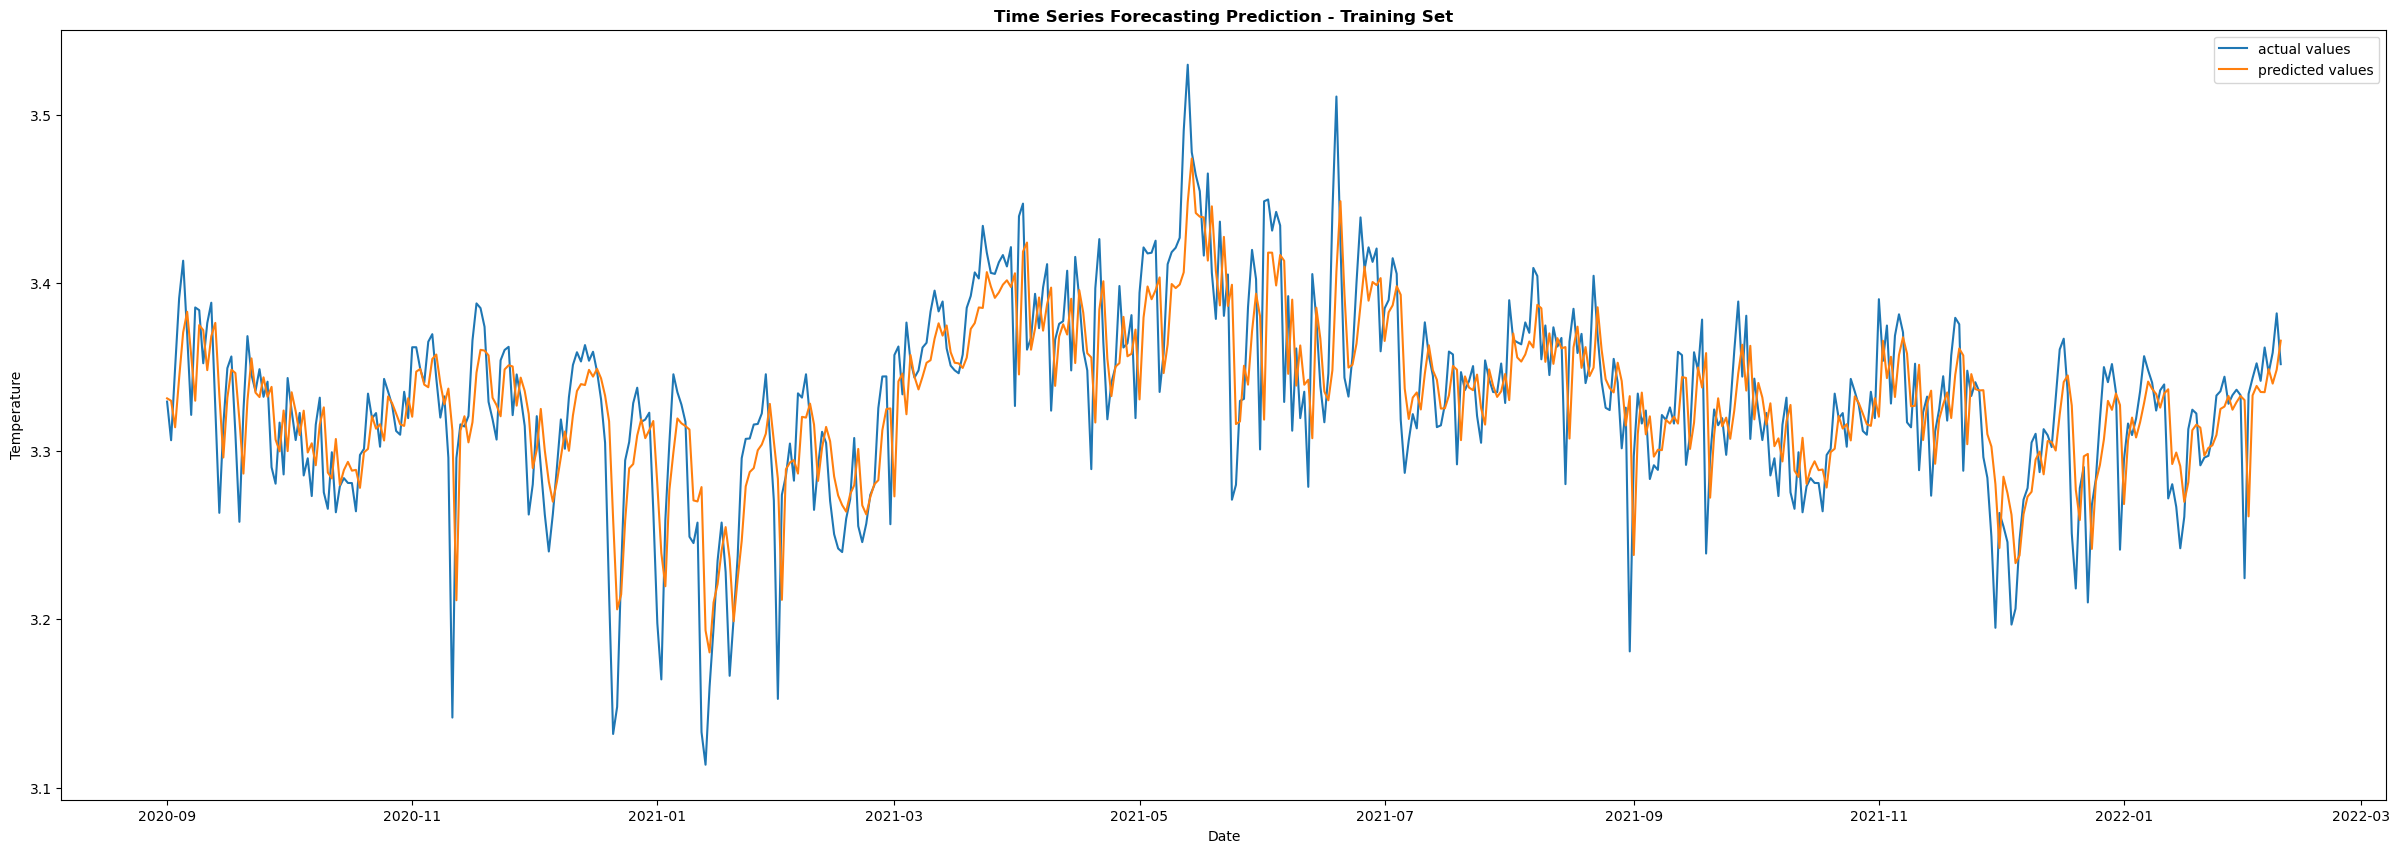

In [326]:
# visualization the result 

plt.figure(figsize=(30,10))

plt.plot(tem_train.index, tem_train.temperature, label = "actual values")
plt.plot(forecast_prediction ,label = "predicted values")

plt.title("Time Series Forecasting Prediction - Training Set", fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

### Testing Set

In [327]:
# predict
start_test = datetime(2022, 2, 10)
end_test = datetime(2022, 3, 31)

model_testing = ARIMA(tem_test, order=(1,0,3))
model_testing = model_testing.fit()

forecast_testing = model_testing.predict(start=start_test, end=end_test)

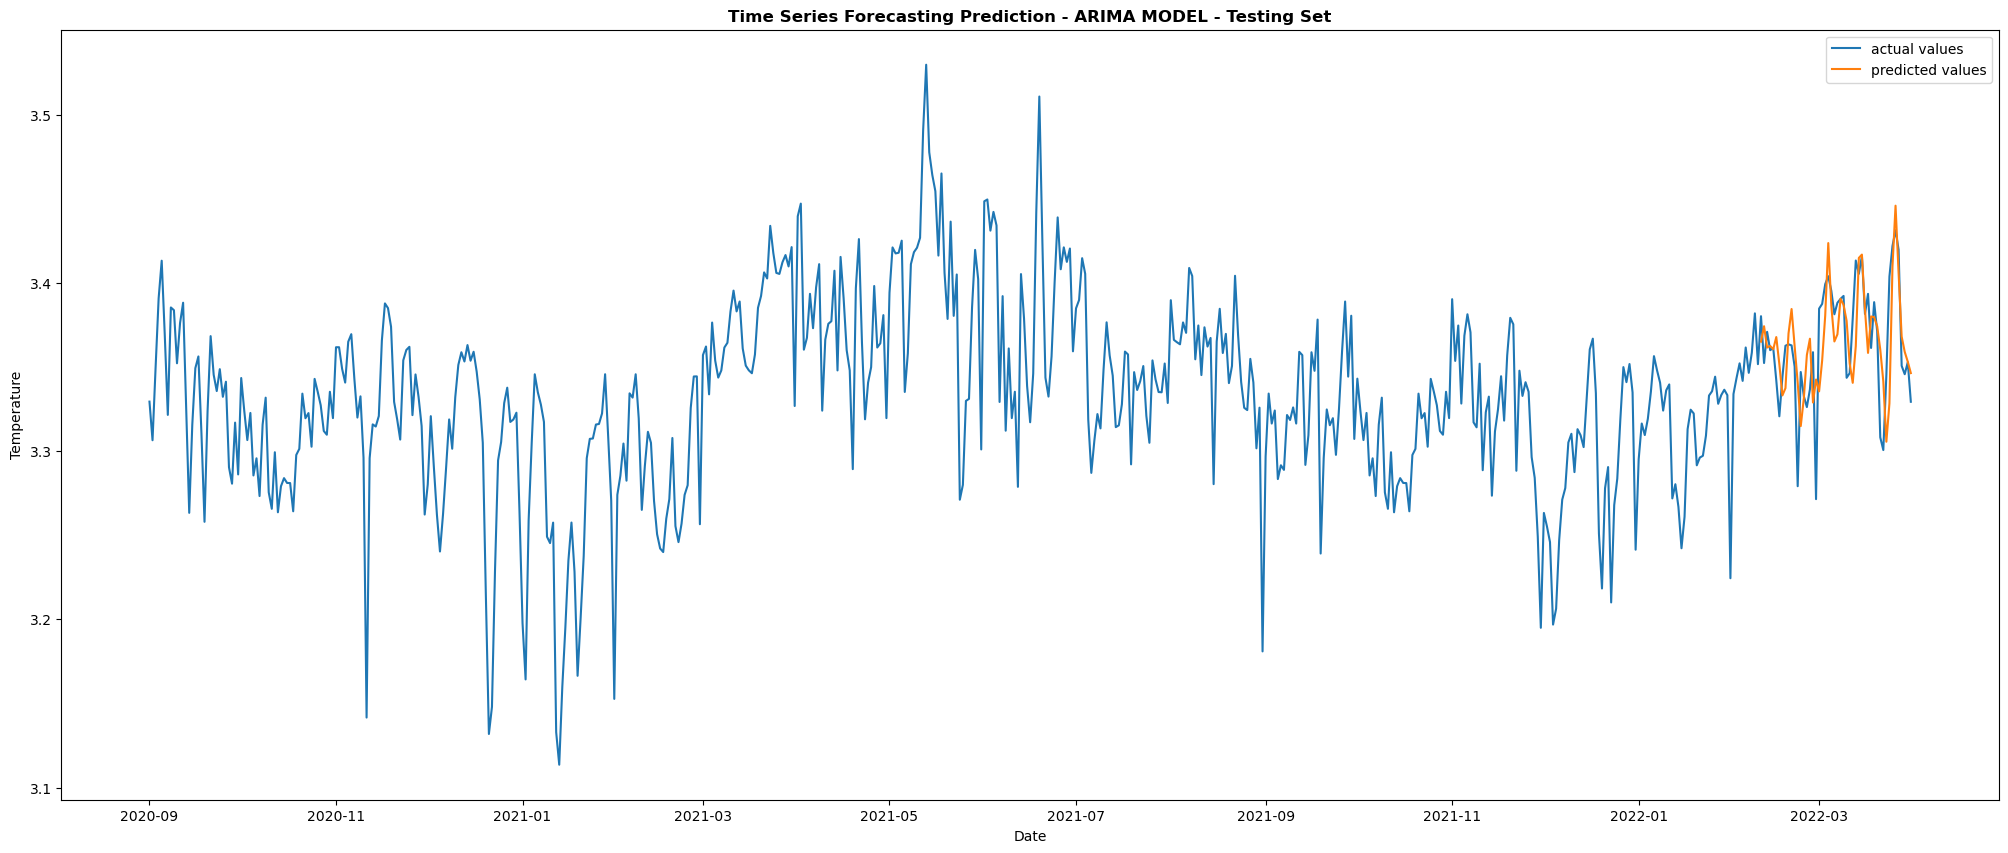

In [329]:
#draw the visual of testing set 

plt.figure(figsize=(25,10))
plt.plot(tem_logscale.index, tem_logscale.temperature, label = "actual values")
plt.plot(forecast_testing ,label = "predicted values")

plt.title("Time Series Forecasting Prediction - ARIMA MODEL - Testing Set", fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [332]:
#call all evaluation matric 

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

arima_mae = mean_absolute_error(tem_test.temperature, forecast_testing)
arima_mape = mean_absolute_percentage_error(tem_test.temperature, forecast_testing)
arima_rmse = np.sqrt(mean_squared_error(tem_test.temperature, forecast_testing))

print()
print()
print("**"*54)
print(f'mae - manual: {arima_mae}')
print("**"*54)

print()
print()
print("**"*54)
print(f'mape - manual: {arima_mape}')
print("**"*54)

print()
print()
print("**"*54)
print(f'rmse - manual: {arima_rmse}')
print("**"*54)



************************************************************************************************************
mae - manual: 0.02229978596854533
************************************************************************************************************


************************************************************************************************************
mape - manual: 0.006648266702654838
************************************************************************************************************


************************************************************************************************************
rmse - manual: 0.028799343344670145
************************************************************************************************************


### SARIMAX Algorithm Training  

In [336]:
#Apply SARIMAX Algorithm

def sarima_model(training_set, test_set, params):
    '''
    Params: it's a tuple where you put together the following SARIMA parameters: ((pdq), (PDQS), trend)
    '''
    history = [x for x in training_set.values]
    prediction = list()
    
    # Using the SARIMA parameters and fitting the data
    pdq, PDQS, trend = params

    #Forecasting one period ahead in the validation set
    for week in range(len(test_set)):
        model = sm.tsa.statespace.SARIMAX(history, order=pdq, seasonal_order=PDQS, trend=trend)
        result = model.fit(disp=False)
        yhat = result.predict(start=len(history), end=len(history))
        prediction.append(yhat[0])
        history.append(test_set[week])
        
    return prediction

In [337]:
#function to check the loss & rmse 
def measure_rmse(y_actual, y_predicted):
    return sqrt(mean_squared_error(y_actual,y_predicted))

### SARIMA Algorithm Evaluation   

In [338]:
#define a validation set 
test_set = tem_test.copy()

In [339]:

# Let's test it in the test set
warnings.filterwarnings("ignore")
#test_set['prediction'] = sarima_model(tem_train['temperature'], test_set['temperature'], ((3,0,0),(0,1,1,12),'c'))
test_set['prediction'] = sarima_model(tem_train['temperature'], test_set['temperature'], ((1,0,3),(0,1,1,12),'c'))


In [340]:
# Measuring the error of the prediction

rmse_prediction = measure_rmse(test_set['temperature'], test_set['prediction'])
print(f"The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was {round(rmse_prediction,4)} errors values of RMSE")



The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was 0.032 errors values of RMSE


It's always important to check the residuals, 
I'm going to create a function to plot some important charts to help us visualize the residuals.

I'm going to plot the following charts:

Current and Predicted values through the time.
Residuals vs Predicted values in an scatterplot.
QQ Plot showing the distribution of errors and its ideal distribution
Autocorrelation plot of the Residuals to see if there is some correlation left.

In [341]:
# Creating the error column
test_set['error'] = test_set['temperature'] - test_set['prediction']
test_set.head()

,temperature,prediction,error
date,,,
2022-02-10,3.380210,3.346367,0.033843
2022-02-11,3.352366,3.370703,-0.018337
2022-02-12,3.370908,3.348143,0.022765
2022-02-13,3.360016,3.360051,-0.000035
2022-02-14,3.361288,3.356174,0.005113


In [342]:
def plot_error_function(data, figsize=(20,8)):
    '''
    There must have 3 columns following this order: Temperature, Prediction, Error
    '''
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    #Plotting the Current and Predicted values
    ax1.plot(data.iloc[:,0:2])
    ax1.legend(['Actual Values','Predicted Valyes'])
    ax1.set_title('Current and Predicted Values')
    
    # Residual vs Predicted values
    ax2.scatter(data.iloc[:,1], data.iloc[:,2])
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Errors')
    ax2.set_title('Errors Versus Predicted Values')
    
    ## QQ Plot of the residual
    sm.graphics.qqplot(data.iloc[:,2], line='r', ax=ax3)
    
    # Autocorrelation plot of the residual
    plot_acf(data.iloc[:,2], lags=(len(data.iloc[:,2])-1),zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()

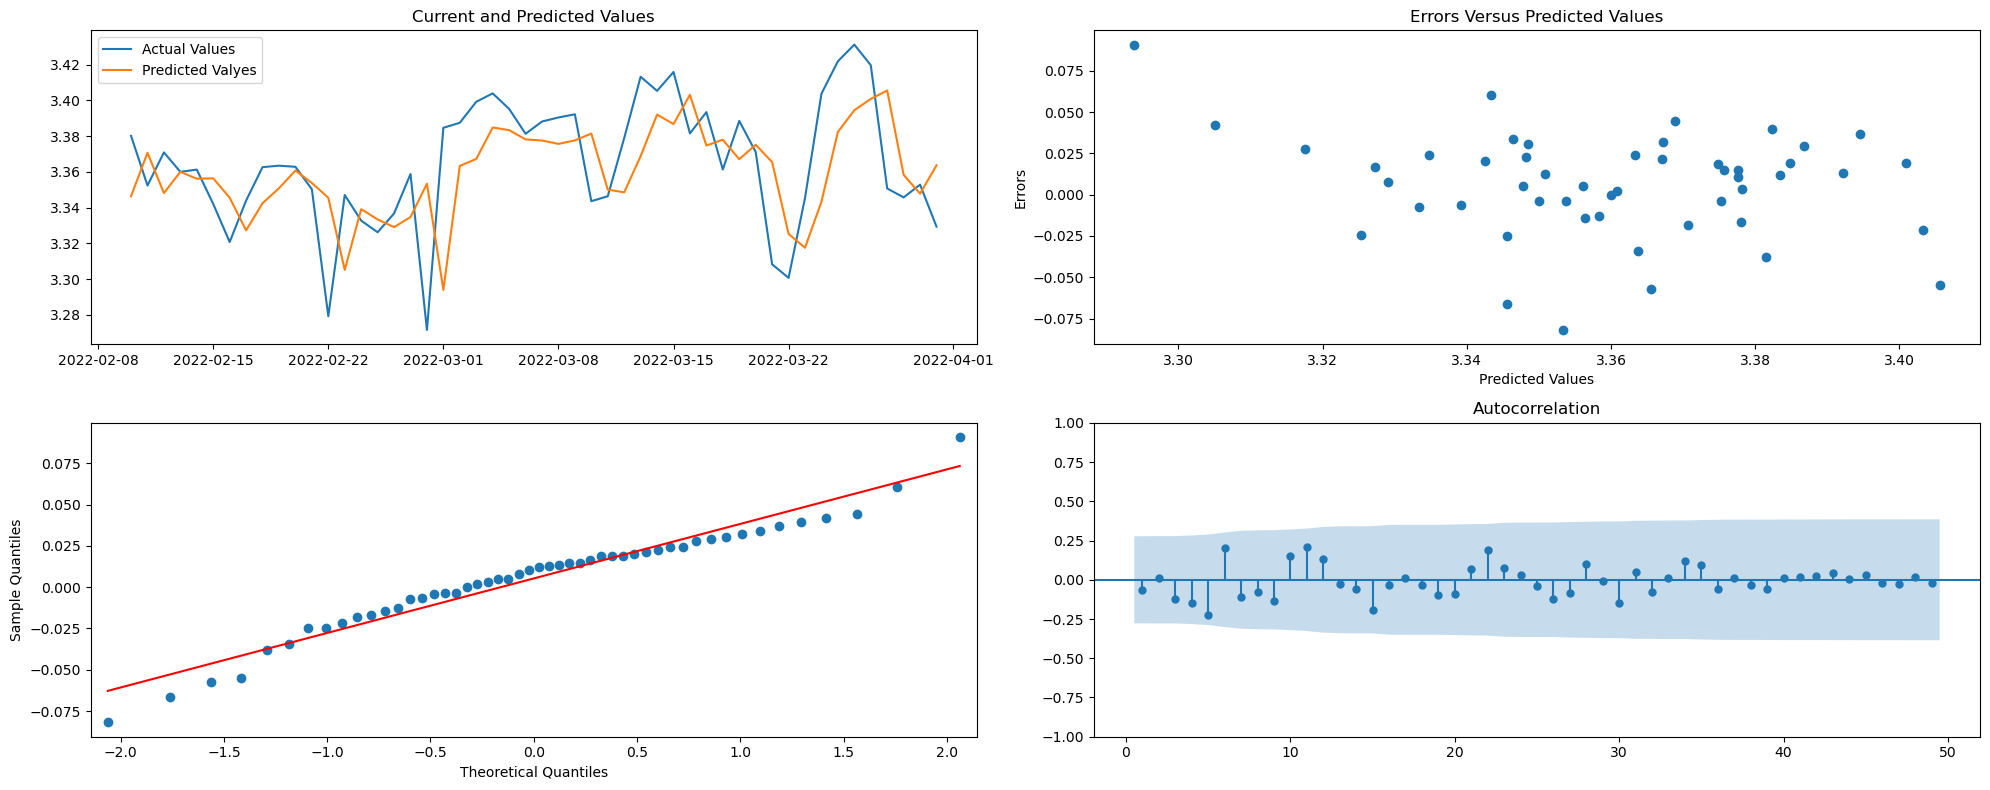

In [343]:
#let plot it out 
plot_error_function(test_set)

Analyzing the plots above we can see that the predictions fit very well on the current values.

The Error vs Predicted values has a linear distribution (the errors are between -1.5 and +1.5 while the temperature increases).

The QQ Plot shows a normal pattern with some little outliers and,

The autocorrelation plot shows a positive spike over the confidence interval just above the second lag, but I believe that there is no need for more changes.

Finally it's time to extrapolate the prediction in the test set for the last 12 months

In [344]:
#call all evaluation matric 

sarima_mae = mean_absolute_error(test_set['temperature'], test_set['prediction'])
sarima_mape = mean_absolute_percentage_error(test_set['temperature'], test_set['prediction'])
sarima_rmse = np.sqrt(mean_squared_error(test_set['temperature'], test_set['prediction']))

print()
print()
print("**"*54)
print(f'mae - manual: {sarima_mae}')
print("**"*54)

print()
print()
print("**"*54)
print(f'mape - manual: {sarima_mape}')
print("**"*54)

print()
print()
print("**"*54)
print(f'rmse - manual: {sarima_rmse}')
print("**"*54)



************************************************************************************************************
mae - manual: 0.024902421680504414
************************************************************************************************************


************************************************************************************************************
mape - manual: 0.007411319951257429
************************************************************************************************************


************************************************************************************************************
rmse - manual: 0.03198767377111736
************************************************************************************************************


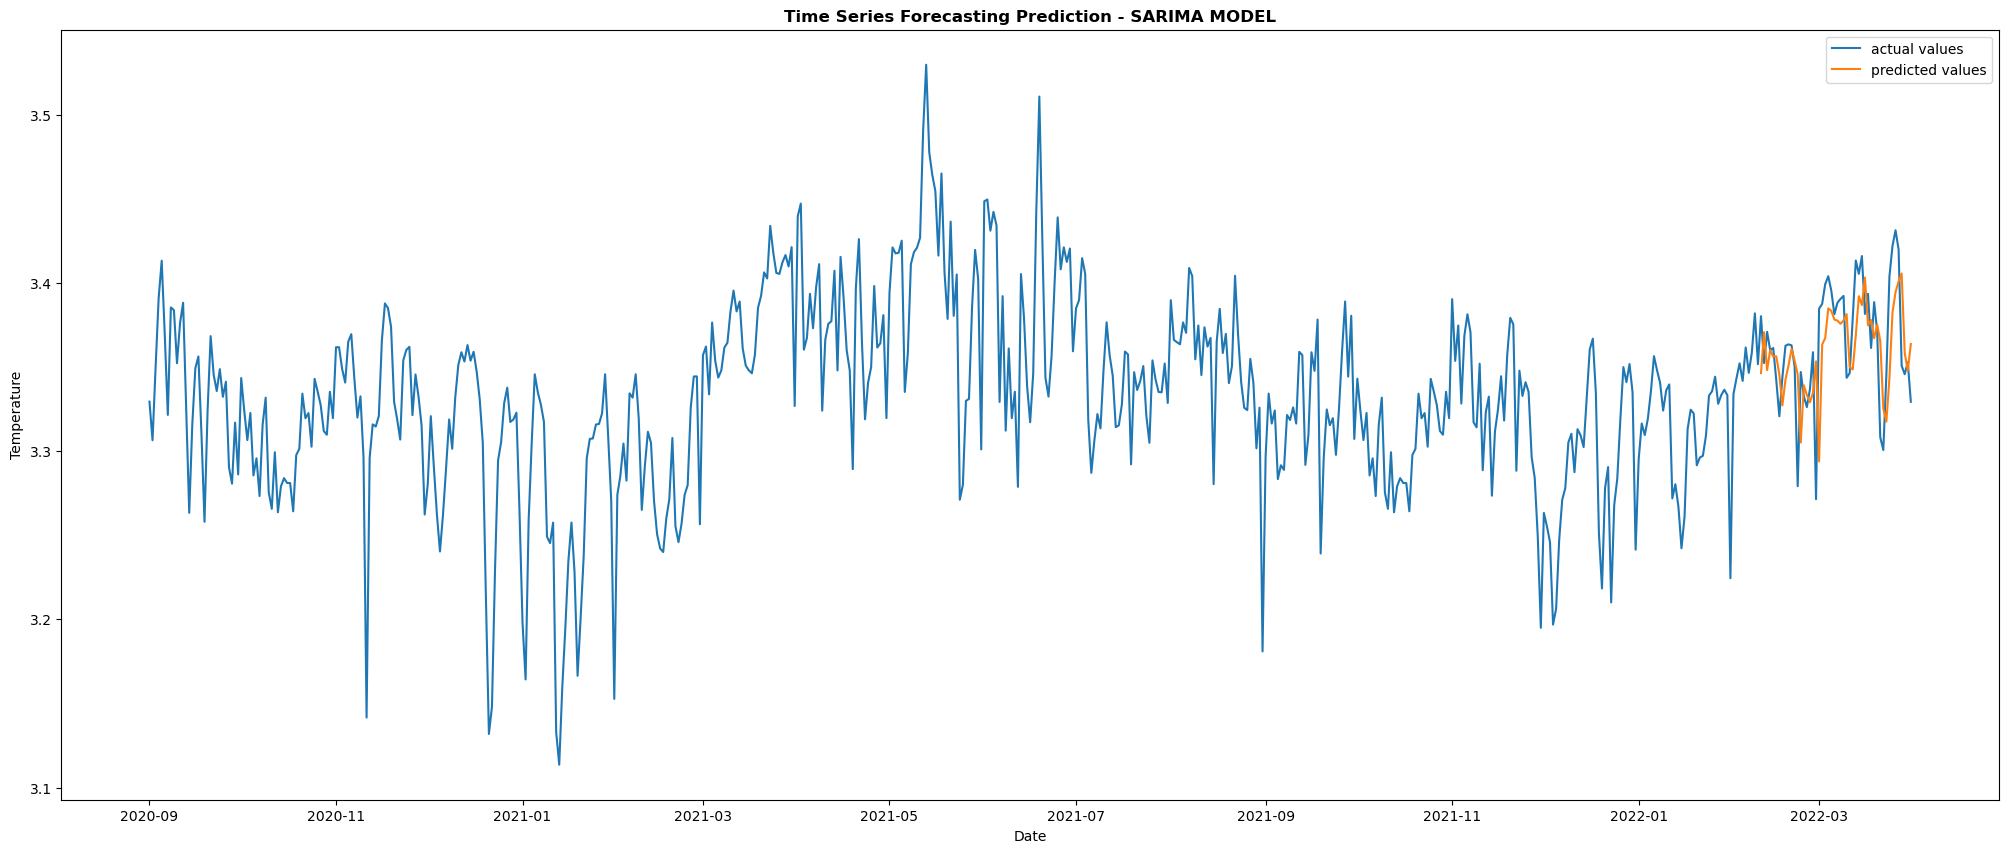

In [345]:
#draw the visual of testing set 

plt.figure(figsize=(25,10))
plt.plot(tem_logscale.index, tem_logscale.temperature, label = "actual values")
plt.plot(test_set['prediction'] ,label = "predicted values")

plt.title("Time Series Forecasting Prediction - SARIMA MODEL", fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()